## Final Project Submission

Please fill out:
* Student name: Luwate Inda
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


In [2902]:
# Your code here - remember to use markdown cells for comments as well!

# Ideas
- Filter out single engines
- Filter out pilot error as cause
- Keep aircraft type
- Make graphs for overall data, just for show

In [2903]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# Importing the data

In [2904]:
df = pd.read_csv('./data/Aviation_Data.csv')
df

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/1748208350.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [2905]:
df[df['Total.Fatal.Injuries'] == df['Total.Fatal.Injuries'].max()]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


# Data shape and preliminary statistics

In [2906]:
df.shape

(90348, 31)

Find the missing values

In [2907]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Above, there is too many values to easily understand the proportion of missing values, so we will use .mean() in order to get the proportion 

In [2908]:
df.isnull().mean()

Event.Id                  0.016149
Investigation.Type        0.000000
Accident.Number           0.016149
Event.Date                0.016149
Location                  0.016724
Country                   0.018650
Latitude                  0.619449
Longitude                 0.619549
Airport.Code              0.445123
Airport.Name              0.416656
Injury.Severity           0.027217
Aircraft.damage           0.051501
Aircraft.Category         0.642637
Registration.Number       0.031445
Make                      0.016846
Model                     0.017167
Amateur.Built             0.017278
Number.of.Engines         0.083488
Engine.Type               0.094689
FAR.Description           0.645559
Schedule                  0.860738
Purpose.of.flight         0.084684
Air.carrier               0.815735
Total.Fatal.Injuries      0.142339
Total.Serious.Injuries    0.154613
Total.Minor.Injuries      0.148227
Total.Uninjured           0.081585
Weather.Condition         0.065868
Broad.phase.of.fligh

In [2909]:
#Top 10 aircraft involved in crashes
(df.groupby('Model').count()['Event.Id']).sort_values(ascending=False)

Model
152                  2367
172                  1756
172N                 1164
PA-28-140             932
150                   829
                     ... 
EMERAUDE SSE-328R       1
EN-28                   1
EN-280-C                1
ENGEL AIR               1
unknown                 1
Name: Event.Id, Length: 12318, dtype: int64

In [2910]:
top_10_index = list((df.groupby('Model').count()['Event.Id']).sort_values(ascending=False).index.values[:10])

In [2911]:
df_top_10 = df[df['Model'].isin(top_10_index)]
df_top_10['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     5956
Instructional                3473
Business                      229
Unknown                       205
Aerial Observation            118
Other Work Use                 67
Positioning                    45
Ferry                          43
Skydiving                      30
Public Aircraft                24
Flight Test                     7
Banner Tow                      7
Public Aircraft - State         2
Executive/corporate             1
Public Aircraft - Federal       1
Air Race show                   1
Glider Tow                      1
Name: count, dtype: int64

<Axes: xlabel='Purpose.of.flight'>

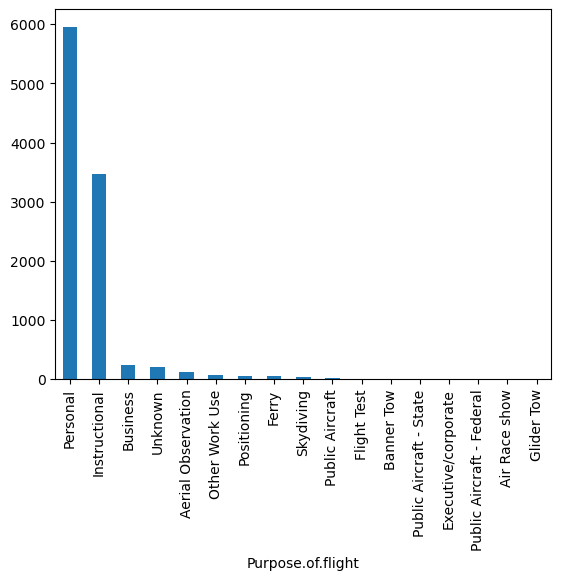

In [2912]:
df_top_10['Purpose.of.flight'].value_counts().plot.bar()

In [2913]:
df['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

<Axes: xlabel='Purpose.of.flight'>

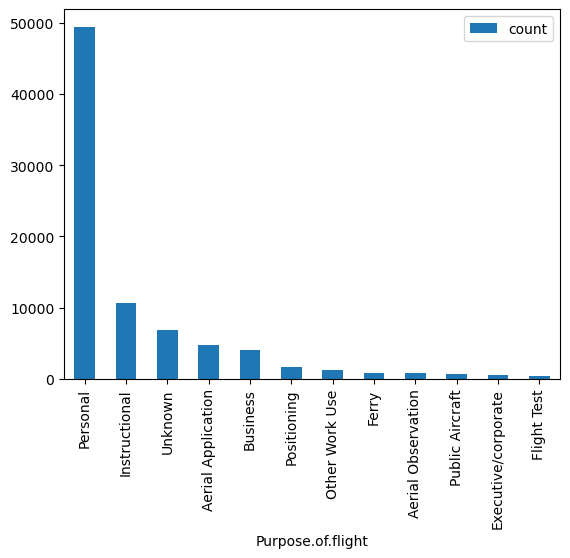

In [2914]:
purpose_df = pd.DataFrame(df['Purpose.of.flight'].value_counts())
purpose_df[:12].plot.bar()

In [2915]:
df[df['Purpose.of.flight']=='Flight Test'].sort_values(by='Number.of.Engines', ascending=False)[['Make', 'Model', 'Number.of.Engines']].head(30)

,Make,Model,Number.of.Engines
85052,Kitty Hawk,Heaviside2,8.0
88714,JOBY AERO INC,JAS4-2,6.0
78978,FACEBOOK UK LTD,AQUILA,4.0
52321,Boeing,S-307,4.0
65695,DASSAULT-BREGUET,FALCON 50,3.0
33353,Canadair,CL-600-2B19,2.0
61550,Beech,BE-200,2.0
61123,Spectrum Aeronautical Llc,33,2.0
60593,Corporate Jets Limited,BAE125-800A,2.0
60465,Messerschmitt-bolkow-blohm,BO 105LS A-3,2.0


### Narrowing the scope
Before handling missing values, the scope of the data will be narrowed in order to only contain flights whose purpose will be similar to the
airlines intended use. i.e a purpose of flight such as firefighting or air races/shows, which may be liklier to have incidents, will be excluded

In [2916]:
relevant_flights = ['Personal', 'Unknown', 'Business', 'Positioning', 'Other Work Use', 'Ferry', 'Public Aircraft', 'Executive/corporate', 
                    'Public Aircraft - Federal', 'Public Aircraft - Local', 'Public Aircraft - State']

In [2917]:
df_relevant = df.copy()

Hold onto missing values, just in case

In [2918]:
df_relevant['Purpose.of.flight'] = df_relevant['Purpose.of.flight'].fillna('Unknown')

In [2919]:
df_relevant[df_relevant['Event.Id'] == '20020124X00116']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,Unknown,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,Unknown,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [2920]:
df_relevant = df_relevant[df_relevant['Purpose.of.flight'].isin(relevant_flights)]

In [2921]:
df_relevant['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     49448
Unknown                      14453
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Public Aircraft                720
Executive/corporate            553
Public Aircraft - Federal      105
Public Aircraft - Local         74
Public Aircraft - State         64
Name: count, dtype: int64

In [2922]:
df_relevant.isnull().mean()

Event.Id                  0.019943
Investigation.Type        0.000000
Accident.Number           0.019943
Event.Date                0.019943
Location                  0.020586
Country                   0.022787
Latitude                  0.629058
Longitude                 0.629140
Airport.Code              0.451987
Airport.Name              0.423227
Injury.Severity           0.033421
Aircraft.damage           0.061662
Aircraft.Category         0.646746
Registration.Number       0.037276
Make                      0.020791
Model                     0.021146
Amateur.Built             0.021283
Number.of.Engines         0.095753
Engine.Type               0.105800
FAR.Description           0.650751
Schedule                  0.871742
Purpose.of.flight         0.000000
Air.carrier               0.821644
Total.Fatal.Injuries      0.142392
Total.Serious.Injuries    0.156048
Total.Minor.Injuries      0.150498
Total.Uninjured           0.087305
Weather.Condition         0.078229
Broad.phase.of.fligh

In [2923]:
df_relevant['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             22540
Helicopter            2279
Glider                 409
Balloon                187
Gyrocraft              149
Weight-Shift           133
Powered Parachute       85
Ultralight              28
Unknown                 14
WSFT                     8
Powered-Lift             4
Blimp                    3
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [2924]:
df_relevant['Aircraft.Category'].fillna('Other', inplace=True)
df_relevant.isnull().mean()

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/2428414349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_relevant['Aircraft.Category'].fillna('Other', inplace=True)


Event.Id                  0.019943
Investigation.Type        0.000000
Accident.Number           0.019943
Event.Date                0.019943
Location                  0.020586
Country                   0.022787
Latitude                  0.629058
Longitude                 0.629140
Airport.Code              0.451987
Airport.Name              0.423227
Injury.Severity           0.033421
Aircraft.damage           0.061662
Aircraft.Category         0.000000
Registration.Number       0.037276
Make                      0.020791
Model                     0.021146
Amateur.Built             0.021283
Number.of.Engines         0.095753
Engine.Type               0.105800
FAR.Description           0.650751
Schedule                  0.871742
Purpose.of.flight         0.000000
Air.carrier               0.821644
Total.Fatal.Injuries      0.142392
Total.Serious.Injuries    0.156048
Total.Minor.Injuries      0.150498
Total.Uninjured           0.087305
Weather.Condition         0.078229
Broad.phase.of.fligh

In [2925]:
df_relevant['Aircraft.Category'].value_counts()

Aircraft.Category
Other                47314
Airplane             22540
Helicopter            2279
Glider                 409
Balloon                187
Gyrocraft              149
Weight-Shift           133
Powered Parachute       85
Ultralight              28
Unknown                 14
WSFT                     8
Powered-Lift             4
Blimp                    3
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

In [2926]:
df_relevant = df_relevant[df_relevant['Aircraft.Category'].isin(['Airplane', 'Unknown', 'Other'])]
df_relevant['Aircraft.Category'].value_counts()

Aircraft.Category
Other       47314
Airplane    22540
Unknown        14
Name: count, dtype: int64

In [2927]:
df_relevant.isnull().mean()

Event.Id                  0.020882
Investigation.Type        0.000000
Accident.Number           0.020882
Event.Date                0.020882
Location                  0.021526
Country                   0.023788
Latitude                  0.648838
Longitude                 0.648924
Airport.Code              0.443293
Airport.Name              0.414224
Injury.Severity           0.034064
Aircraft.damage           0.062518
Aircraft.Category         0.000000
Registration.Number       0.038401
Make                      0.021727
Model                     0.022113
Amateur.Built             0.022271
Number.of.Engines         0.091673
Engine.Type               0.095509
FAR.Description           0.679911
Schedule                  0.871887
Purpose.of.flight         0.000000
Air.carrier               0.834173
Total.Fatal.Injuries      0.143929
Total.Serious.Injuries    0.158742
Total.Minor.Injuries      0.153175
Total.Uninjured           0.089512
Weather.Condition         0.073954
Broad.phase.of.fligh

In [2928]:
df_relevant[df_relevant['Event.Id'] == '20020124X00116']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,Unknown,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,NaN,NaN,NaN,NaN,...,Unknown,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [2929]:
df_relevant.drop(columns=['FAR.Description','Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight', 
                          'Report.Status', 'Publication.Date'], inplace = True)
df_relevant.isnull().mean()

Event.Id                  0.020882
Investigation.Type        0.000000
Accident.Number           0.020882
Event.Date                0.020882
Location                  0.021526
Country                   0.023788
Injury.Severity           0.034064
Aircraft.damage           0.062518
Aircraft.Category         0.000000
Registration.Number       0.038401
Make                      0.021727
Model                     0.022113
Amateur.Built             0.022271
Number.of.Engines         0.091673
Engine.Type               0.095509
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.143929
Total.Serious.Injuries    0.158742
Total.Minor.Injuries      0.153175
Total.Uninjured           0.089512
Weather.Condition         0.073954
dtype: float64

# Data Cleaning

In [2930]:
df_cleaned = df_relevant.copy()

## Duplicate Values

There are duplicate `Event.Id` values. These likely multiple aircraft being involved in the same Event i.e mid-air or on-ground collision.
Therefore, we will drop such instances as such Events as in the modern day, they represent operational errors rather than aircraft safety

__*See: TCAS*__

In [2931]:
df_cleaned[df_cleaned['Event.Id']== '20020124X00116']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,Other,NaN,...,TU-154,No,NaN,NaN,Unknown,349.0,NaN,NaN,NaN,NaN
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,Other,NaN,...,747-168,No,NaN,NaN,Unknown,349.0,NaN,NaN,NaN,NaN


In [2932]:
df_cleaned[df_cleaned.duplicated(subset=['Event.Id'])]['Total.Fatal.Injuries'].max()

np.float64(349.0)

In [2933]:
df_cleaned.drop_duplicates(subset='Event.Id', keep=False, inplace=True)

In [2934]:
df_cleaned[df_cleaned['Event.Id']== '20020124X00116']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition


In [2935]:
df_cleaned['Total.Souls'] = df_cleaned['Total.Fatal.Injuries'] + df_cleaned['Total.Serious.Injuries'] + df_cleaned['Total.Minor.Injuries'] + df_cleaned['Total.Uninjured']

In [2936]:
df_cleaned[df_cleaned['Number.of.Engines']==1].describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls
count,51158.0,44812.000000,44235.000000,44722.000000,47803.000000,43168.000000
mean,1.0,0.402615,0.243653,0.310339,1.114512,1.878614
std,0.0,0.887404,0.606104,0.706020,1.781969,1.321524
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.0,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.0,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.0,14.000000,7.000000,25.000000,200.000000,124.000000


In [2937]:
df_cleaned[df_cleaned['Number.of.Engines']==1]['Total.Souls']

0        2.0
1        4.0
2        NaN
3        2.0
6        4.0
        ... 
90318    1.0
90320    2.0
90332    1.0
90336    1.0
90345    1.0
Name: Total.Souls, Length: 51158, dtype: float64

In [2938]:
df_temp = df_cleaned.copy()
df_temp.dropna(subset=['Number.of.Engines', 'Total.Souls'], inplace=True)
df_temp.isnull().mean()

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.000248
Country                   0.003450
Injury.Severity           0.004936
Aircraft.damage           0.027140
Aircraft.Category         0.000000
Registration.Number       0.000381
Make                      0.000133
Model                     0.000515
Amateur.Built             0.000000
Number.of.Engines         0.000000
Engine.Type               0.034725
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         0.022585
Total.Souls               0.000000
dtype: float64

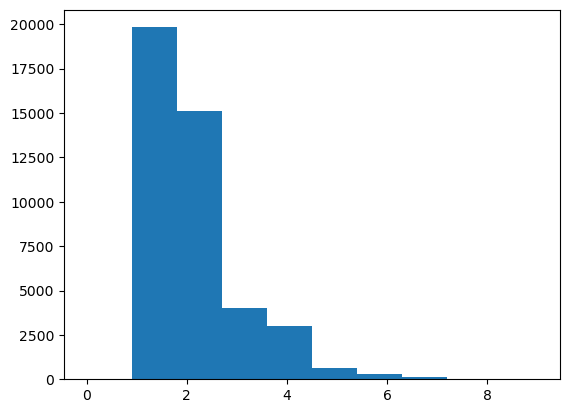

In [2939]:
fig, ax = plt.subplots()
ax.hist(pd.DataFrame(df_temp[(df_temp['Number.of.Engines']==1) & (df_temp['Total.Souls']<10)]['Total.Souls']), bins =10);

In [2940]:
df_cleaned[df_cleaned['Number.of.Engines']>1].describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls
count,10514.000000,9243.000000,9103.000000,9047.000000,9941.000000,8819.000000
mean,2.112517,1.259872,0.406679,0.632143,24.600443,25.429754
std,0.414689,9.506520,2.975075,3.405133,58.264922,58.848309
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000
75%,2.000000,1.000000,0.000000,0.000000,6.000000,7.000000
max,4.000000,270.000000,137.000000,125.000000,576.000000,576.000000


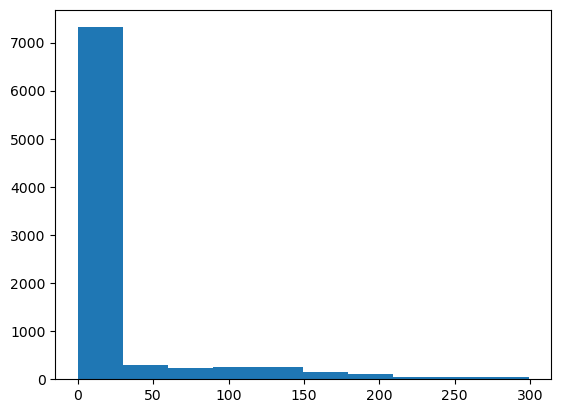

In [2941]:
fig, ax = plt.subplots()
ax.hist(pd.DataFrame(df_cleaned[(df_cleaned['Number.of.Engines']>1)& (df_temp['Total.Souls']<300)]['Total.Souls']), bins =10);

Impute missing values

In [2942]:
df_cleaned.isnull().mean()

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.000670
Country                   0.002905
Injury.Severity           0.013452
Aircraft.damage           0.040565
Aircraft.Category         0.000000
Registration.Number       0.017370
Make                      0.000864
Model                     0.001266
Amateur.Built             0.001385
Number.of.Engines         0.072117
Engine.Type               0.076393
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.125032
Total.Serious.Injuries    0.139676
Total.Minor.Injuries      0.134268
Total.Uninjured           0.070717
Weather.Condition         0.054702
Total.Souls               0.163422
dtype: float64

In [2943]:
df_cleaned.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls
count,62286.000000,58734.000000,57751.000000,58114.000000,62380.000000,56157.000000
mean,1.177937,0.722001,0.300099,0.387153,5.975906,6.670923
std,0.464920,5.788309,1.739801,2.532036,28.706278,28.567575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,3.000000
max,4.000000,295.000000,161.000000,380.000000,576.000000,576.000000


In [2944]:
df_cleaned['Total.Fatal.Injuries'].fillna(df_cleaned['Total.Fatal.Injuries'].median(), inplace=True)
df_cleaned['Total.Serious.Injuries'].fillna(df_cleaned['Total.Serious.Injuries'].median(), inplace=True)
df_cleaned['Total.Minor.Injuries'].fillna(df_cleaned['Total.Minor.Injuries'].median(), inplace=True)
df_cleaned['Total.Uninjured'].fillna(df_cleaned['Total.Uninjured'].median(), inplace=True)
df_cleaned['Number.of.Engines'].fillna(df_cleaned['Number.of.Engines'].median(), inplace=True)
df_cleaned['Total.Souls'] = df_cleaned['Total.Fatal.Injuries'] + df_cleaned['Total.Serious.Injuries'] + df_cleaned['Total.Minor.Injuries'] + df_cleaned['Total.Uninjured']

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/1639016839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Total.Fatal.Injuries'].fillna(df_cleaned['Total.Fatal.Injuries'].median(), inplace=True)
/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/1639016839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

In [2945]:
df_cleaned.isnull().mean()

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.000670
Country                   0.002905
Injury.Severity           0.013452
Aircraft.damage           0.040565
Aircraft.Category         0.000000
Registration.Number       0.017370
Make                      0.000864
Model                     0.001266
Amateur.Built             0.001385
Number.of.Engines         0.000000
Engine.Type               0.076393
Purpose.of.flight         0.000000
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         0.054702
Total.Souls               0.000000
dtype: float64

In [2946]:
df_cleaned.dropna(axis=0, inplace=True)

In [2947]:
df_cleaned.isnull().mean()

Event.Id                  0.0
Investigation.Type        0.0
Accident.Number           0.0
Event.Date                0.0
Location                  0.0
Country                   0.0
Injury.Severity           0.0
Aircraft.damage           0.0
Aircraft.Category         0.0
Registration.Number       0.0
Make                      0.0
Model                     0.0
Amateur.Built             0.0
Number.of.Engines         0.0
Engine.Type               0.0
Purpose.of.flight         0.0
Total.Fatal.Injuries      0.0
Total.Serious.Injuries    0.0
Total.Minor.Injuries      0.0
Total.Uninjured           0.0
Weather.Condition         0.0
Total.Souls               0.0
dtype: float64

An observation to be made is most incidents occur on single-engine aircraft. These aircraft also have a median of 2 and a mean of 1.87 souls on-board. This is well below the mean of roughly 6 souls on private flights and 100 on public flights. Thus an assumption can be made that single-engine aircraft will be insufficient and drop the data of planes with 1 engine or less

In [2948]:
df_cleaned.drop(df_cleaned[df_cleaned['Number.of.Engines']<=1].index, inplace=True)
df_cleaned.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls
count,8458.000000,8458.000000,8458.000000,8458.000000,8458.000000,8458.000000
mean,2.091275,1.077087,0.299480,0.493970,13.986522,15.857058
std,0.375673,8.416607,2.649311,3.191425,44.234998,45.703555
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,2.000000,1.000000,0.000000,0.000000,4.000000,5.000000
max,4.000000,270.000000,137.000000,125.000000,576.000000,576.000000


In [2949]:
df_cleaned['Event.Date'] = pd.to_datetime(df_cleaned['Event.Date'])

In [2950]:
df_cleaned['Make'] = df_cleaned['Make'].str.title()
df_cleaned['Make'] = df_cleaned['Make'].str.strip()
df_cleaned['Make'].value_counts()

Make
Cessna                        2000
Piper                         1694
Beech                         1624
Boeing                         508
Mcdonnell Douglas              218
                              ... 
Howard Aircraft Corp.            1
Ercoupe                          1
Md Helicopter                    1
Saab-Scania                      1
Piper Aircraft Corporation       1
Name: count, Length: 250, dtype: int64

In [2951]:
df_cleaned['Model'] = df_cleaned['Model'].str.upper()
df_cleaned['Model'] = df_cleaned['Model'].str.strip()
df_cleaned['Model'].value_counts()

Model
PA-23-250     245
PA-31-350     239
58            198
PA-34-200T    175
PA-30         168
             ... 
D18-S           1
T-337-D         1
N22B            1
727-100QC       1
PELICAN         1
Name: count, Length: 1788, dtype: int64

In [2952]:
df_cleaned['Make'].unique()

array(['Mcdonnell Douglas', 'Cessna', 'Beechcraft', 'Piper', 'Curtis',
       'Embraer', 'Boeing', 'Swearingen', 'Beech', 'Convair',
       'De Havilland', 'Canadair', 'Douglas', 'Robertson', 'Grumman',
       'Mitsubishi', 'Mcdonnell-Douglas', 'Ted Smith', 'Ercoupe',
       'Howard Aircraft Corp.', 'Nihon', 'Fairchild Hiller',
       'Smith Aerostar', 'Nord Aviation', 'Rockwell', 'Curtiss-Wright',
       'Gulfstream American', 'Piper-Aerostar', 'Lockheed', 'Smith',
       'Gates Learjet', 'Martin', 'Aero Commander', 'Wing', 'Learjet',
       'Britten-Norman', 'Fairchild/Swearingen', 'Fairchild',
       'Short Bros.', 'Grumman American', 'Mcdonald Douglas',
       'Beagle Aircraft', 'Rockwell International', 'Fokker',
       'Gates Lear Jet', 'Bell', 'Israel Aircraft Industries',
       'Smith, Ted Aerostar', 'Gulfstream', "Gemini Int'L.", 'Partenavia',
       'Mbb', 'Curtiss', 'North American Rockwell Corp.', 'Zenair',
       'Aerostar', 'Camair Aircraft Corp.', 'Boeing Vertol', 'Siko

In [2953]:
make_mapping = {
    'Boeing': ['Boeing', 'Boeing Commercial', 'Boeing Company', 'Boeing Co.'],
    'Cessna': ['Cessna', 'Cessna Aircraft', 'Cessna Textron'],
    'Piper': ['Piper', 'Piper Aircraft', 'Piper Aircraft Corp.', 'Piper Inc.'],
    'Beechcraft': ['Beechcraft', 'Beech', 'Beech Aircraft', 'Beechcraft Corp.'],
    'Airbus': ['Airbus', 'Airbus Industrie', 'Airbus SAS'],
    'Bell': ['Bell', 'Bell Helicopter', 'Bell Textron'],
    'Robinson': ['Robinson', 'Robinson Helicopter'],
    'Embraer': ['Embraer', 'Embraer Aircraft', 'Embraer S.A.'],
    'Bombardier': ['Bombardier', 'Canadair', 'Canadair (Bombardier)'],
    'Lockheed Martin': ['Lockheed', 'Lockheed Martin', 'Lockheed Aircraft'],
    'Mooney': ['Mooney', 'Mooney Aircraft', 'Mooney International'],
    'Cirrus': ['Cirrus', 'Cirrus Aircraft', 'Cirrus Design Corp.'],
    'Sikorsky': ['Sikorsky', 'Sikorsky Aircraft', 'Sikorsky Helicopter'],
    'McDonnell Douglas': ['McDonnell', 'Douglas', 'McDonnell Douglas', 'Mcdonnell Douglas'],
    'De Havilland': ['De Havilland', 'de Havilland Canada', 'Dehavilland'],
    'Gulfstream': ['Gulfstream', 'Gulfstream Aerospace', 'Gulfstream American'],
    'Grumman': ['Grumman', 'Grumman American', 'Grumman Aerospace'],
    'Raytheon' : ['Raytheon', 'Raytheon Aircraft Company', 'Raytheon Corporate Jets'],
    'Rockwell' : ['Rockwell', 'Rockwell International'],
    'Learjet' : ['Learjet', 'Learjet Inc'],
    'Gates Learjet' : ['Gates Learjet', 'Gates Learjet Corp.'],
    'Saab' : ['Saab', 'Saab-Scania Ab (Saab)'],
    'Dassault': ['Dassault', 'Dassault-Breguet', 'Dassault Aviation']

}

mapping = {variation: standard for standard, variations in make_mapping.items() for variation in variations}
df_cleaned['Make'] = df_cleaned['Make'].map(lambda x: next((mapping[v] for v in mapping if x.startswith(v)), x))

In [2954]:
df_cleaned['Make'].value_counts()

Make
Cessna                            2001
Piper                             1700
Beechcraft                        1634
Boeing                             514
McDonnell Douglas                  386
                                  ... 
Willingham, Dave L.                  1
Franklin-Sullivan Technologies       1
Ardovino Mariucci                    1
Pilatus Britten-Norman               1
Pyka Inc                             1
Name: count, Length: 202, dtype: int64

In [2955]:
df_cleaned.shape

(8458, 22)

# Analysis

In [2956]:
accidents_per_year = df_cleaned.groupby(df_cleaned['Event.Date'].dt.year).size()
accidents_per_year

Event.Date
1979      1
1982    449
1983    415
1984    453
1985    417
1986    328
1987    350
1988    287
1989    277
1990    265
1991    256
1992    243
1993    261
1994    234
1995    267
1996    252
1997    238
1998    234
1999    221
2000    225
2001    195
2002    207
2003    208
2004    203
2005    198
2006    186
2007    173
2008    156
2009    112
2010    155
2011    137
2012    125
2013    109
2014    103
2015     89
2016     87
2017     93
2018     93
2019     86
2020     48
2021     10
2022     12
dtype: int64

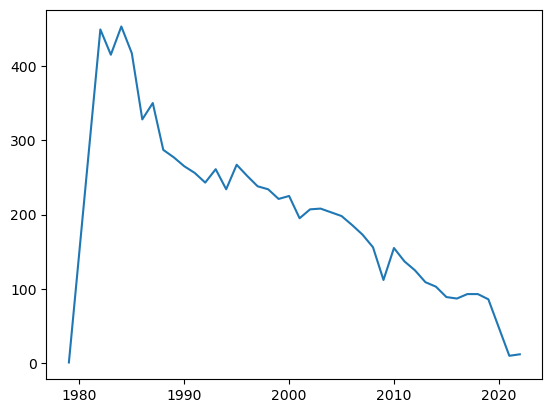

In [2957]:
fig, ax = plt.subplots()
ax.plot(accidents_per_year.index, accidents_per_year.values)

In [2958]:
fatalities_per_year = df_cleaned[df_cleaned['Total.Fatal.Injuries']>=1].groupby(df_cleaned['Event.Date'].dt.year)['Total.Fatal.Injuries'].sum()
serious_injuries_per_year = df_cleaned[df_cleaned['Total.Serious.Injuries']>=1].groupby(df_cleaned['Event.Date'].dt.year)['Total.Serious.Injuries'].sum()
minor_injuries_per_year = df_cleaned[df_cleaned['Total.Minor.Injuries']>=1].groupby(df_cleaned['Event.Date'].dt.year)['Total.Minor.Injuries'].sum()

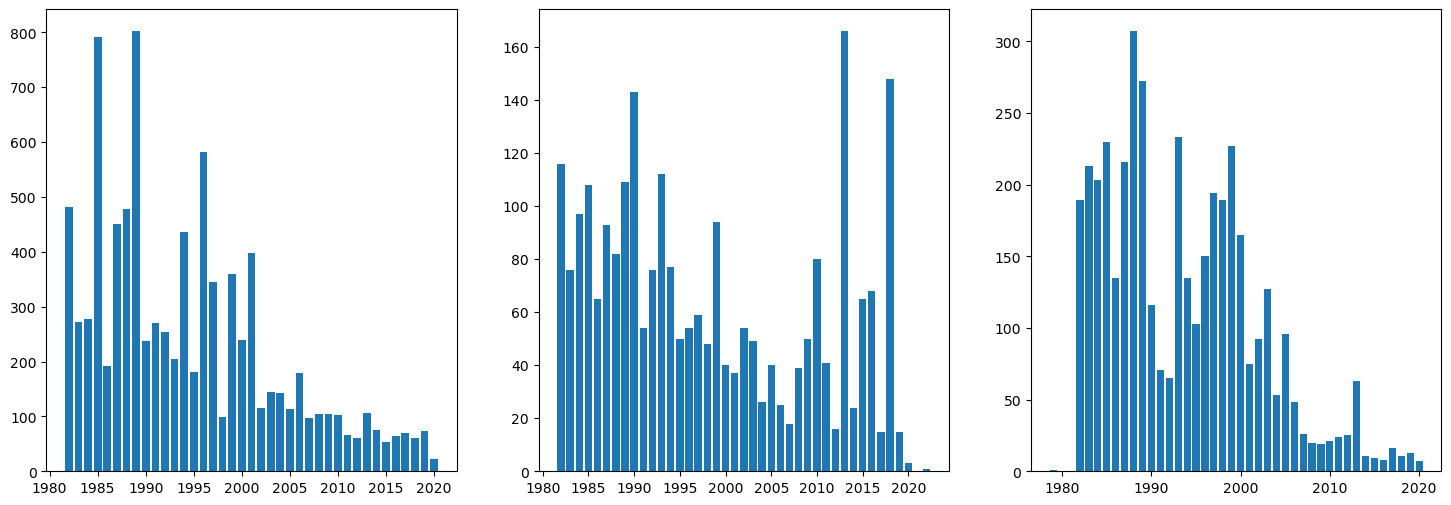

In [2959]:
fig, ax = plt.subplots(nrows = 1, ncols =3, figsize=(18,6))
ax[0].bar(fatalities_per_year.index, fatalities_per_year.values)
ax[1].bar(serious_injuries_per_year.index, serious_injuries_per_year.values)
ax[2].bar(minor_injuries_per_year.index, minor_injuries_per_year.values);

There is also a downtrend in fatalities, serious injuries as well as minor injuries on a year-on-year basis. Thus we can conclude that aviation safety in general, and in the "XXX" Air's sector in particular, is constantly improving and between 2021 and 2023, for the first time in recorded data, there were zero fatalities in the sector. This may be as a result of improvements in operations, improvements in aircraft safety, or a combination of both.

In order to understand which aircraft are more likely to be involved in Events, we first analyse each maker's record 

In [2960]:
df_cleaned['Make'].value_counts()

Make
Cessna                            2001
Piper                             1700
Beechcraft                        1634
Boeing                             514
McDonnell Douglas                  386
                                  ... 
Willingham, Dave L.                  1
Franklin-Sullivan Technologies       1
Ardovino Mariucci                    1
Pilatus Britten-Norman               1
Pyka Inc                             1
Name: count, Length: 202, dtype: int64

In [2961]:
df_cleaned.groupby('Make').size()

Make
Aero Commander                  172
Aerospace                         1
Aerospace Tech. Of Australia      1
Aerospatiale                     49
Aerospatiale Alenia               1
                               ... 
Willingham, Dave L.               1
Wilson William M                  1
Wing                              1
Wing Aircraft Co.                 1
Zenair                            1
Length: 202, dtype: int64

In [2962]:
accidents_by_make = df_cleaned.groupby('Make').size()
accidents_by_make = accidents_by_make[accidents_by_make.values>=5].sort_values(ascending = False)
accidents_by_make

Make
Cessna                           2001
Piper                            1700
Beechcraft                       1634
Boeing                            514
McDonnell Douglas                 386
Aero Commander                    172
Mitsubishi                        126
Swearingen                        121
Bombardier                        103
Learjet                            92
Embraer                            90
De Havilland                       85
Grumman                            84
Rockwell                           83
Airbus                             75
Bell                               67
Lockheed Martin                    67
Gates Learjet                      59
Gulfstream                         57
Sikorsky                           57
Fairchild                          55
Aerospatiale                       49
British Aerospace                  47
Mbb                                47
Smith, Ted Aerostar                46
Raytheon                           45
Dassaul

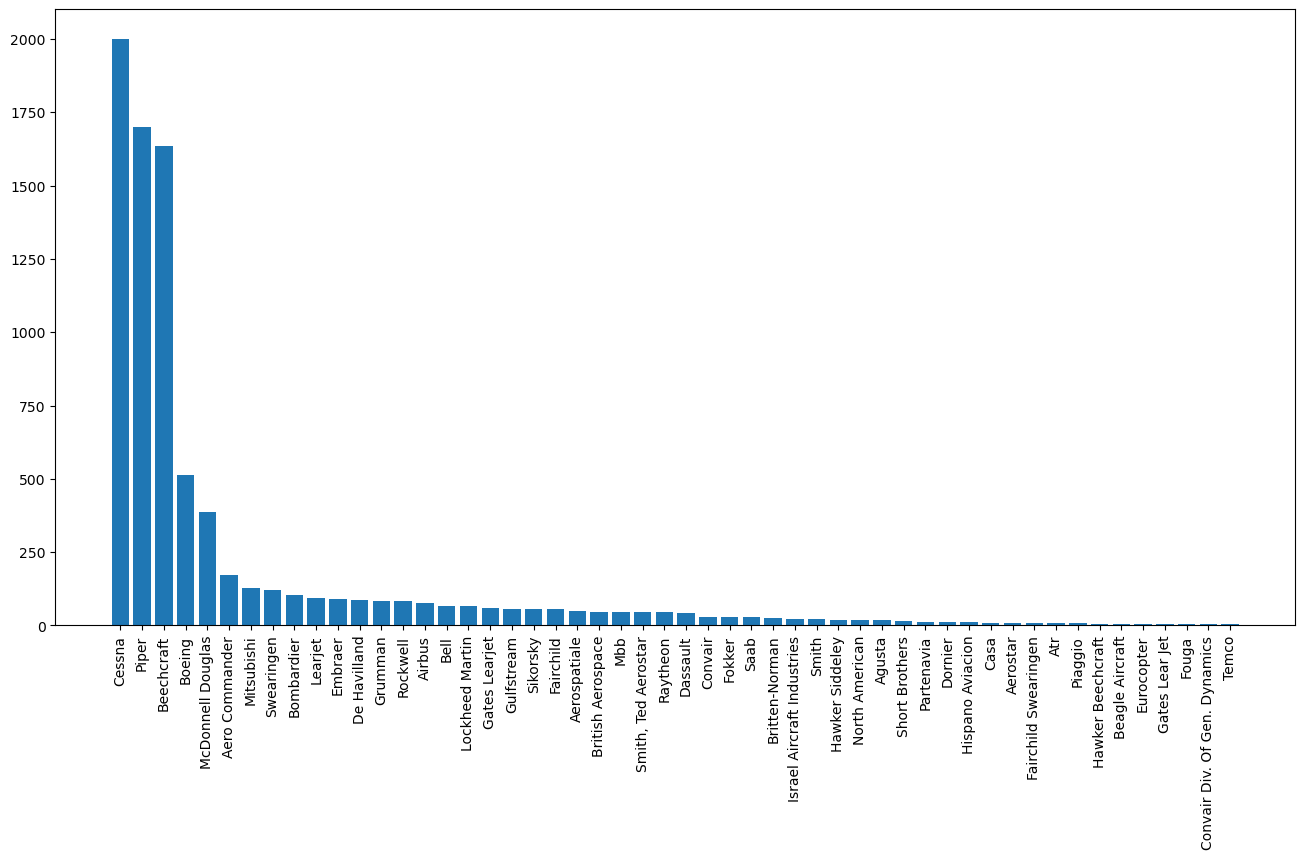

In [2963]:
fig, ax = plt.subplots(figsize = (16,8))
ax.bar(accidents_by_make.index, accidents_by_make.values)
ax.tick_params(axis='x', labelrotation=90)

Beachcraft, Cessna and Piper seem to be the aircraft involved in the most events. However, this may be as a result of the magnitude of these aircraft being more numerous and it is not in itself indicative of a lack of safety of these aircraft. 

In order to measure the safety of each maker, the survivability of each incident can be evaluated. To do this, we will evaluate the fatality and injury metrics against souls on-board for makers that have had five or more Events. 

In [2964]:
outcome_by_make = df_cleaned.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Souls']].sum()
outcome_by_make['Total.Events'] = df_cleaned.groupby('Make').size()
outcome_by_make = outcome_by_make[outcome_by_make['Total.Events'] >= 5]
sorted_make = outcome_by_make.sort_values(by='Total.Souls', ascending=False)
outcome_by_make = outcome_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False)
outcome_by_make.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events
Make,,,,,,
Boeing,1846.0,602.0,919.0,53096.0,56463.0,514
Cessna,1462.0,428.0,500.0,3184.0,5574.0,2001
Beechcraft,1245.0,288.0,396.0,3234.0,5163.0,1634
Piper,1214.0,312.0,428.0,2503.0,4457.0,1700
McDonnell Douglas,1128.0,278.0,759.0,24660.0,26825.0,386


In [2965]:
fatal_injuries = outcome_by_make['Total.Fatal.Injuries']
serious_injuries = outcome_by_make['Total.Serious.Injuries']
minor_injuries = outcome_by_make['Total.Minor.Injuries']
uninjured = outcome_by_make['Total.Uninjured']

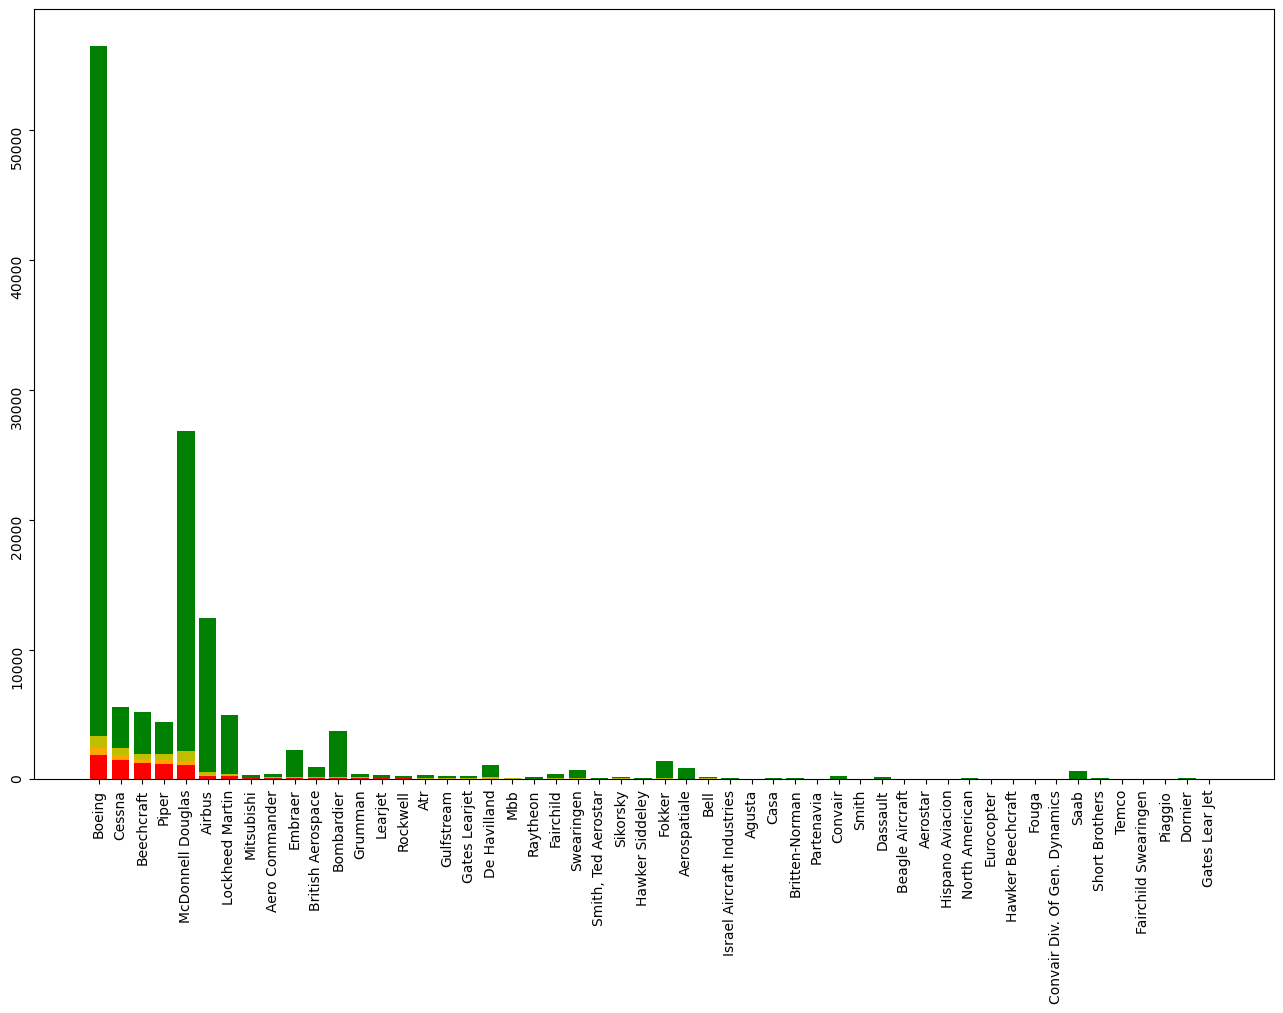

In [2966]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(outcome_by_make.index, fatal_injuries, color = 'r')
ax.bar(outcome_by_make.index, serious_injuries, bottom=fatal_injuries, color = 'orange')
ax.bar(outcome_by_make.index, minor_injuries, bottom=fatal_injuries+serious_injuries, color = 'y')
ax.bar(outcome_by_make.index, uninjured, bottom=fatal_injuries+serious_injuries+minor_injuries, color = 'g')
ax.tick_params(rotation = 90)

Exclude the top 3 to understand the rest better

In [2967]:
outcome_by_make_3 = outcome_by_make.copy()
outcome_by_make_3.drop(index= ["Boeing", "McDonnell Douglas", "Airbus"], axis = 0,inplace=True)
fatal_injuries_3 = outcome_by_make_3['Total.Fatal.Injuries']
serious_injuries_3 = outcome_by_make_3['Total.Serious.Injuries']
minor_injuries_3 = outcome_by_make_3['Total.Minor.Injuries']
uninjured_3 = outcome_by_make_3['Total.Uninjured']

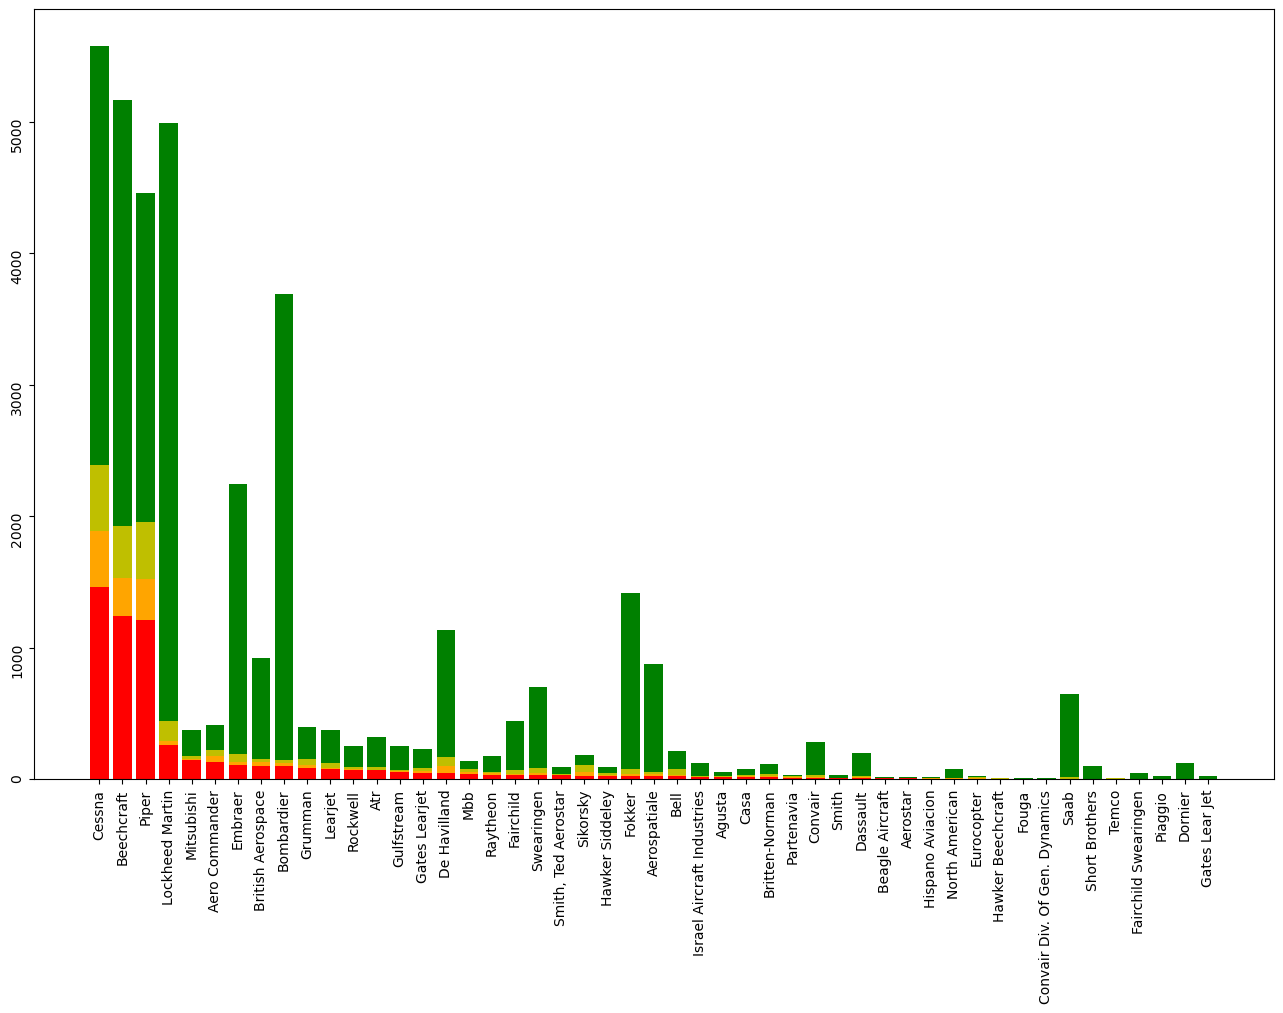

In [2968]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(outcome_by_make_3.index, fatal_injuries_3, color = 'r')
ax.bar(outcome_by_make_3.index, serious_injuries_3, bottom=fatal_injuries_3, color = 'orange')
ax.bar(outcome_by_make_3.index, minor_injuries_3, bottom=fatal_injuries_3+serious_injuries_3, color = 'y')
ax.bar(outcome_by_make_3.index, uninjured_3, bottom=fatal_injuries_3+serious_injuries_3+minor_injuries_3, color = 'g')
ax.tick_params(rotation = 90)

For easier understanding, a graph showing ratio of survivors to passengers will be plotted

In [2969]:
survivability_by_make = outcome_by_make.copy()
survivability_by_make['Survivability'] = (survivability_by_make['Total.Uninjured']+survivability_by_make['Total.Serious.Injuries']+
                                          survivability_by_make['Total.Minor.Injuries'])/survivability_by_make['Total.Souls']
#survivability_by_make.sort_values(by='Survivability', ascending=False, inplace=True)
survivability_by_make.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Survivability
Make,,,,,,,
Boeing,1846.0,602.0,919.0,53096.0,56463.0,514,0.967306
Cessna,1462.0,428.0,500.0,3184.0,5574.0,2001,0.737711
Beechcraft,1245.0,288.0,396.0,3234.0,5163.0,1634,0.758861
Piper,1214.0,312.0,428.0,2503.0,4457.0,1700,0.727619
McDonnell Douglas,1128.0,278.0,759.0,24660.0,26825.0,386,0.957950


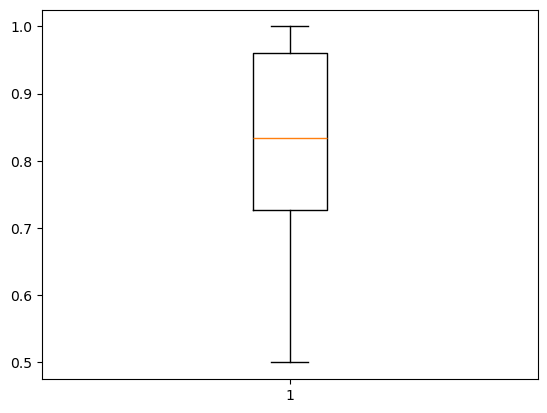

In [2970]:
fig, ax = plt.subplots()
ax.boxplot(survivability_by_make['Survivability']);

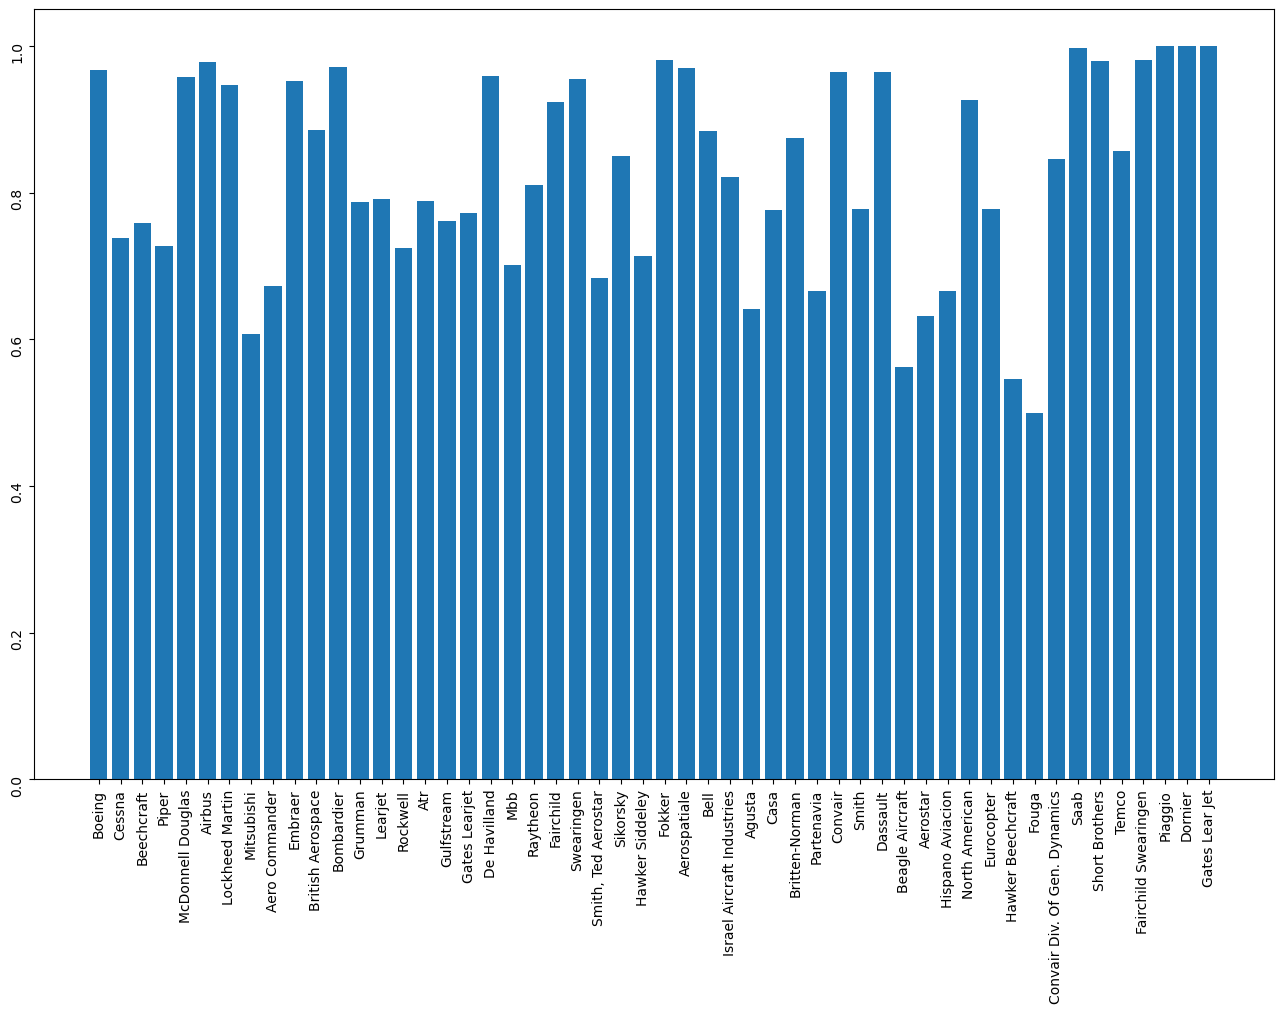

In [2971]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(survivability_by_make.index, survivability_by_make['Survivability'])
ax.tick_params(rotation = 90);

From this perspective, Dassault Aviation, Dornier, Gates Lear Jet, Piaggio and Saab have perfect survivability. However, their combined souls on board are quite few, hence this may not be conclusive for a commercial jet. It will instead be more of use when evaluating private options which will be done later on.

Commercial jets from the following companies will be evaluated against each other:
- Boeing
- McDonnell Douglas
- Airbus
- Lockheed Martin
- Embraer 
- De Havilland
- Fokker
- Aersspatiale
- Saab
- Dornier

These are makers who have exceptional survivability, when compared to the brands that surround them in terms measured by total fatalities

In [2972]:
commercial_candidates = [ 'Boeing', 'McDonnell Douglas', 'Airbus', 'Lockheed Martin', 'Embraer', 'De Havilland', 'Fokker', 
                         'Aerospatiale', 'Saab', 'Dornier']
df_makers = df_cleaned.copy()
df_makers = df_makers[df_makers['Make'].isin(commercial_candidates)]

df_makers['Make'].value_counts()


Make
Boeing               514
McDonnell Douglas    386
Embraer               90
De Havilland          85
Airbus                75
Lockheed Martin       67
Aerospatiale          49
Fokker                29
Saab                  28
Dornier               11
Name: count, dtype: int64

In [2973]:
outcome_by_model = df_makers.groupby('Model').sum(numeric_only=True)
outcome_by_model['Total.Events'] = df_makers.groupby('Model').size()
outcome_by_model = outcome_by_model[(outcome_by_model['Total.Events']>=3) & (outcome_by_model['Total.Souls']>240)]
outcome_by_model = outcome_by_model.sort_values(by = 'Total.Fatal.Injuries', ascending=False)
outcome_by_model

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events
Model,,,,,,,
747-121,16.0,270.0,2.0,3.0,16.0,291.0,4
DC-8-63,24.0,263.0,1.0,3.0,198.0,465.0,6
747-131,12.0,230.0,0.0,0.0,554.0,784.0,3
747-300,12.0,228.0,26.0,0.0,454.0,708.0,3
DC-9-82,32.0,156.0,2.0,9.0,1623.0,1790.0,16
...,...,...,...,...,...,...,...
757-223,10.0,0.0,1.0,35.0,570.0,606.0,5
757-232,18.0,0.0,0.0,0.0,1265.0,1265.0,9
757-251,12.0,0.0,1.0,6.0,717.0,724.0,6


In [2974]:
fatal_injuries = outcome_by_model['Total.Fatal.Injuries']
serious_injuries = outcome_by_model['Total.Serious.Injuries']
minor_injuries = outcome_by_model['Total.Minor.Injuries']
uninjured = outcome_by_model['Total.Uninjured']

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/2423867809.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0., 79], [750, 750], "k--", color = 'b')


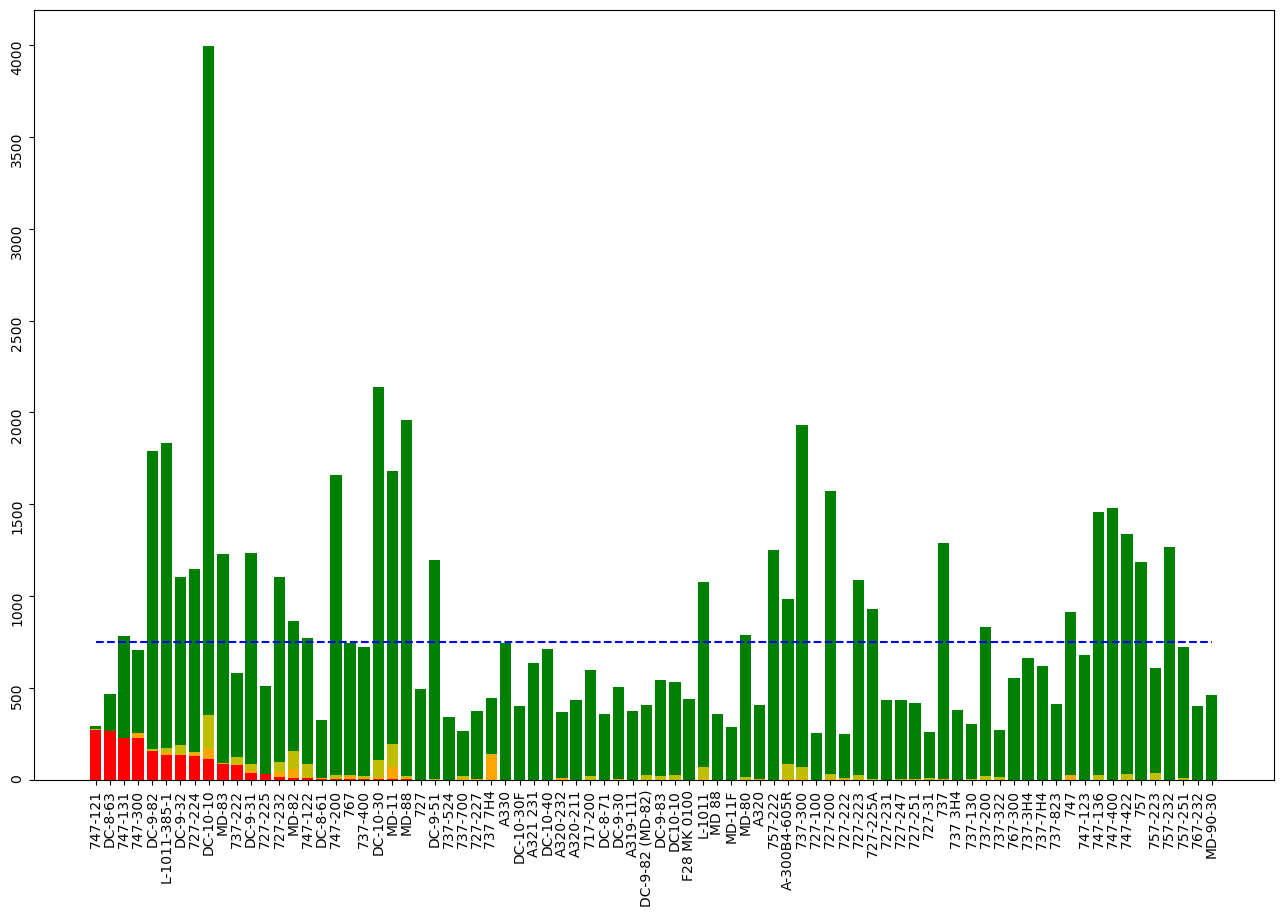

In [2975]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(outcome_by_model.index, fatal_injuries, color = 'r')
ax.bar(outcome_by_model.index, serious_injuries, bottom=fatal_injuries, color = 'orange')
ax.bar(outcome_by_model.index, minor_injuries, bottom=fatal_injuries+serious_injuries, color = 'y')
ax.bar(outcome_by_model.index, uninjured, bottom=fatal_injuries+serious_injuries+minor_injuries, color = 'g')
ax.plot([0., 79], [750, 750], "k--", color = 'b')
ax.tick_params(rotation = 90)

In [3005]:
outcome_by_model.index

Index(['747-121', 'DC-8-63', '747-131', '747-300', 'DC-9-82', 'L-1011-385-1',
       'DC-9-32', '727-224', 'DC-10-10', 'MD-83', '737-222', 'DC-9-31',
       '727-225', '727-232', 'MD-82', '747-122', 'DC-8-61', '747-200', '767',
       '737-400', 'DC-10-30', 'MD-11', 'MD-88', '727', 'DC-9-51', '737-524',
       '737-700', '727-227', '737 7H4', 'A330', 'DC-10-30F', 'A321 231',
       'DC-10-40', 'A320-232', 'A320-211', '717-200', 'DC-8-71', 'DC-9-30',
       'A319-111', 'DC-9-82 (MD-82)', 'DC-9-83', 'DC10-10', 'F28 MK 0100',
       'L-1011', 'MD 88', 'MD-11F', 'MD-80', 'A320', '757-222', 'A-300B4-605R',
       '737-300', '727-100', '727-200', '727-222', '727-223', '727-225A',
       '727-231', '727-247', '727-251', '727-31', '737', '737 3H4', '737-130',
       '737-200', '737-322', '767-300', '737-3H4', '737-7H4', '737-823', '747',
       '747-123', '747-136', '747-400', '747-422', '757', '757-223', '757-232',
       '757-251', '767-232', 'MD-90-30'],
      dtype='object', name='Model')

In [2976]:
survivability_by_model = outcome_by_model.copy()
survivability_by_model['Survivability'] = (survivability_by_model['Total.Uninjured']+survivability_by_model['Total.Serious.Injuries']+
                                          survivability_by_model['Total.Minor.Injuries'])/survivability_by_model['Total.Souls']
survivability_by_model.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Survivability
Model,,,,,,,,
747-121,16.0,270.0,2.0,3.0,16.0,291.0,4,0.072165
DC-8-63,24.0,263.0,1.0,3.0,198.0,465.0,6,0.434409
747-131,12.0,230.0,0.0,0.0,554.0,784.0,3,0.706633
747-300,12.0,228.0,26.0,0.0,454.0,708.0,3,0.677966
DC-9-82,32.0,156.0,2.0,9.0,1623.0,1790.0,16,0.912849


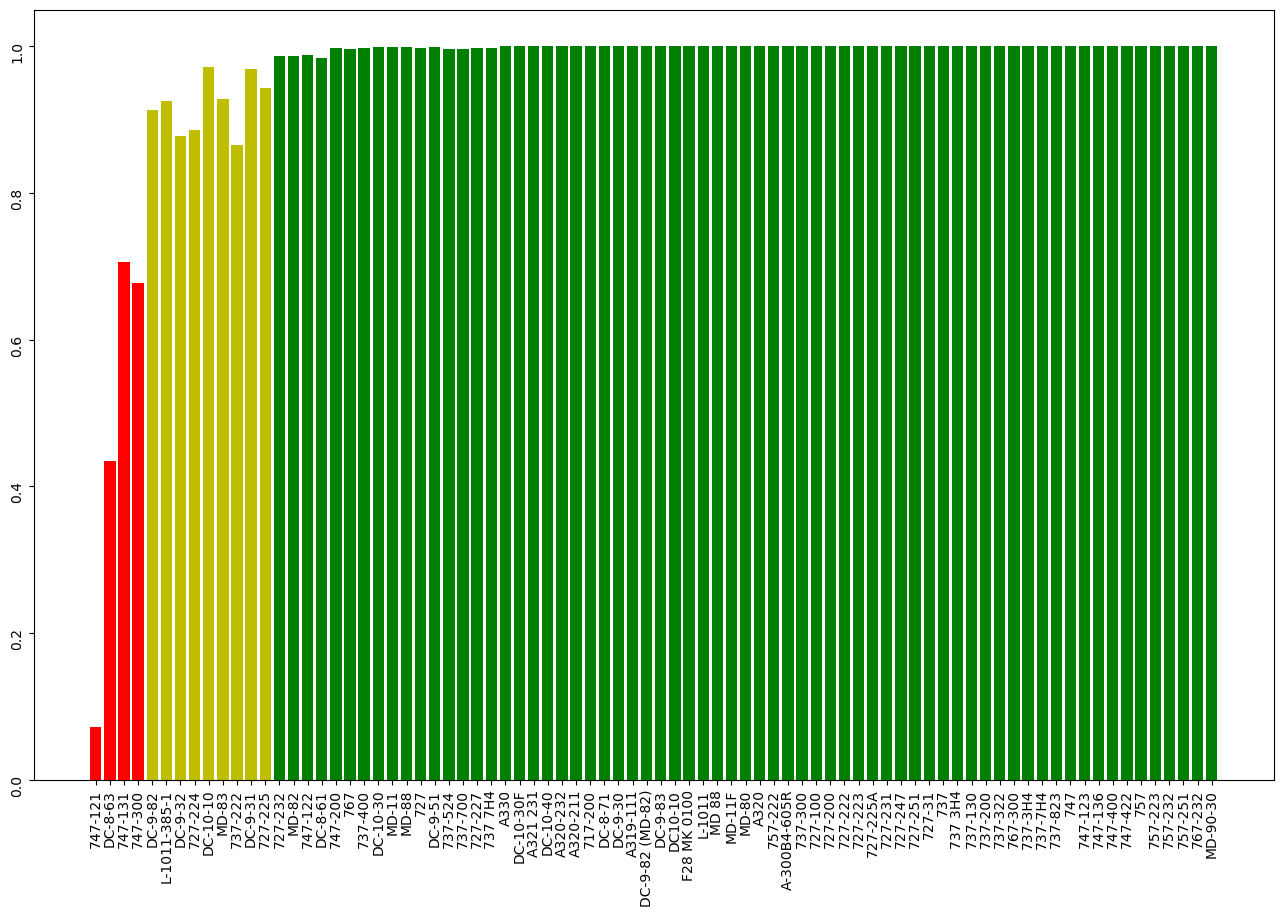

In [2977]:
fig, ax = plt.subplots(figsize = (16,10))
low_colours = survivability_by_model[survivability_by_model['Survivability']<0.8].index
mid_colours = survivability_by_model[(survivability_by_model['Survivability']>0.8) & (survivability_by_model['Survivability']<0.98)].index
colours = ['r' if element in low_colours else 'y' if element in mid_colours else 'g' for element in survivability_by_model.index]
ax.bar(survivability_by_model.index, survivability_by_model['Survivability'], color = colours)
ax.tick_params(rotation = 90);

Candidates:
- 757
- 727
- 737
- A300
- A320
- L-1011
# FILTER BY YEAR TO IMPLY NOVELTY AND MAKE DECISION THAT WAY

In [3008]:
models = ['757', '727', '737', 'A300', 'A320', 'L-1011']
aircraft_mapping = {
    '747-121': '747',
    '747-131': '747',
    '747-300': '747',
    '747-122': '747',
    '747-200': '747',
    '747-123': '747',
    '747-136': '747',
    '747-400': '747',
    '747-422': '747',
    
    '757-222': '757',
    '757-223': '757',
    '757-232': '757',
    '757-251': '757',
    '757': '757',
    
    '727-224': '727',
    '727-225': '727',
    '727-232': '727',
    '727-225A': '727',
    '727-227': '727',
    '727-231': '727',
    '727-247': '727',
    '727-251': '727',
    '727-31': '727',
    '727-222': '727',
    '727-223': '727',
    '727-225': '727',
    '727-100': '727',
    '727-200': '727',
    
    '737-222': '737',
    '737-524': '737',
    '737-400': '737',
    '737-322': '737',
    '737-823': '737',
    '737-130': '737',
    '737-200': '737',
    '737-3H4': '737',
    '737-7H4': '737',
    '737-300': '737',
    '737 7H4': '737',
    '737 3H4': '737',
    '737': '737',

    'A-300B4-605R': 'A300',
    'A300': 'A300',
    
    'A320-232': 'A320',
    'A320-211': 'A320',
    'A320': 'A320',
    
    'L-1011-385-1': 'L-1011',
    'L-1011': 'L-1011'
}

# Apply the mapping to your DataFrame
final = df_cleaned.copy()
final['Model'] = final['Model'].replace(aircraft_mapping)
final = final[final['Model'].isin(models)]
final['Model'].value_counts()


Model
727       104
737        85
757        34
L-1011     16
A320        9
A300        4
Name: count, dtype: int64

In [3015]:
final_stats = final.groupby('Model').mean(numeric_only=True)
final_stats['Total.Events'] = final.groupby('Model').size()
final_stats['Incident.Year'] = final[['Model', 'Event.Date']].groupby("Model").median()['Event.Date'].dt.year
final_stats

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Incident.Year
Model,,,,,,,,
727,3.0,1.692308,0.519231,1.336538,85.605769,89.153846,104,1988
737,2.0,0.964706,1.858824,1.976471,98.635294,103.435294,85,1999
757,2.0,0.000000,0.058824,1.205882,146.764706,148.029412,34,2000
A300,2.0,0.000000,1.500000,20.500000,223.500000,245.500000,4,1996
A320,2.0,0.000000,1.222222,0.222222,133.666667,135.111111,9,2007
L-1011,3.0,8.437500,1.375000,5.250000,166.500000,181.562500,16,1986


In [3016]:
final_stats = final_stats[final_stats['Incident.Year']>=2000]
final_stats

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Incident.Year
Model,,,,,,,,
757,2.0,0.0,0.058824,1.205882,146.764706,148.029412,34,2000
A320,2.0,0.0,1.222222,0.222222,133.666667,135.111111,9,2007


<BarContainer object of 2 artists>

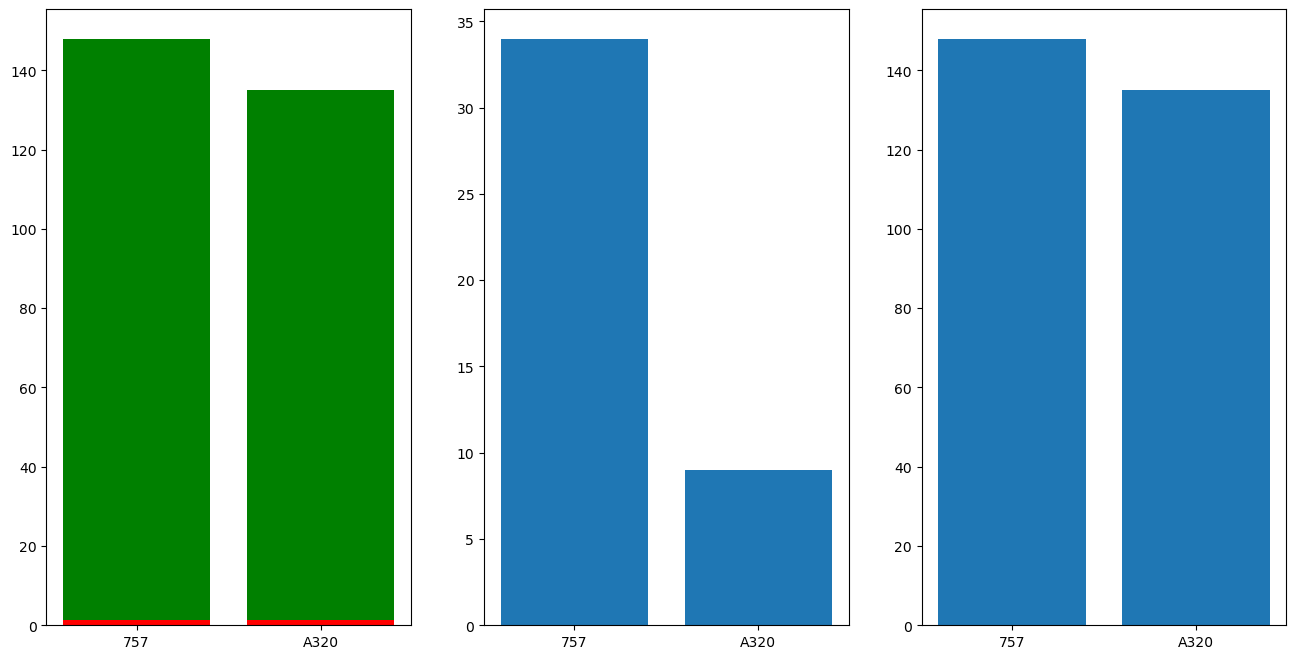

In [3017]:
fig, ax = plt.subplots(nrows=1, ncols =3, figsize= (16,8))
ax[0].bar(final_stats.index, (final_stats['Total.Souls'] - final_stats['Total.Uninjured']), color = 'r')
ax[0].bar(final_stats.index, final_stats['Total.Uninjured'], color = 'g', bottom = (final_stats['Total.Souls'] - final_stats['Total.Uninjured']))

ax[1].bar(final_stats.index, final_stats['Total.Events'])

ax[2].bar(final_stats.index, final_stats['Total.Souls'])

The final decision is a toss-up between the 757 and A320. These aircraft are very similarly matched. The 757 has a marginally better ratio of Total Uninjured to Total Souls, however, the A320 has had fewer Events, which implies safety as it is involved in less events. In addition, the A320 can be inferred to be a slightly newer jet given its median accident year is 7 years ahead of the 757 and thus can take advantage of safety improvements. Moreover, the 757 can on average carry about 13 more passengers than the A320, which will be beneficial for the airline.

Ultimately the airline should select the __Boeing 757__ for commercial use. From a safety perspective, it is battle-tested. It has been involved in more Events that the A320 and has had less serious injuries on average. In addition, the A320 having fewer Events does not guarantee its safety. This is because the lower figure may be as a result of the aircraft being newer and having lower adoption rates than the 757. 

## Private Aircraft
Ideally, for a private aircraft, the requirements will change slightly, thus restrictions will be placed on `Purpose.of.flight` to "Personal", "Unknown", "Business" and "Executive/corporate", with "Total.Souls" restricted to less than 20

In [2978]:
df_cleaned['Purpose.of.flight'].value_counts()

Purpose.of.flight
Personal                     3068
Unknown                      3047
Business                      965
Positioning                   556
Executive/corporate           379
Ferry                         217
Public Aircraft               110
Other Work Use                 91
Public Aircraft - Federal      16
Public Aircraft - State         5
Public Aircraft - Local         4
Name: count, dtype: int64

In [2979]:
df_private = df_cleaned.copy()
private_purpose = ['Unknown', "Personal", "Business", "Executive/corporate"]
df_private = df_private[(df_private['Purpose.of.flight'].isin(private_purpose)) & (df_private['Total.Souls']<20)]
df_private

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Souls
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,N7967Q,...,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,2.0
25,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,Fatal(8),Destroyed,Airplane,N2620L,...,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,8.0
26,20020917X01720,Accident,ATL82FA033,1982-01-03,"PINEHURST, NC",United States,Fatal(1),Destroyed,Airplane,N10VS,...,No,2.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1.0
33,20020917X02254,Accident,LAX82FA038,1982-01-04,"NEAR LAS VEGAS, NV",United States,Fatal(2),Destroyed,Airplane,N1956H,...,No,2.0,Reciprocating,Unknown,2.0,0.0,0.0,0.0,VMC,2.0
34,20020917X01880,Accident,CHI82FA019,1982-01-04,"FORT WAYNE, IN",United States,Fatal(2),Destroyed,Airplane,N2CU,...,No,2.0,Reciprocating,Personal,2.0,2.0,0.0,0.0,IMC,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89339,20220614105259,Accident,CEN22LA246,2022-06-09,"Greenbrier, AR",United States,Non-Fatal,Substantial,Airplane,N53705,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2.0
89508,20220714105471,Accident,ERA22LA311,2022-07-05,"Livingston, TN",United States,Non-Fatal,Substantial,Airplane,N955V,...,No,2.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,2.0
89555,20220726105587,Accident,WPR22LA272,2022-07-13,"Scappoose, WA",United States,Non-Fatal,Substantial,Airplane,N601NG,...,No,2.0,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC,1.0
89576,20220720105531,Accident,ERA22LA325,2022-07-15,"Brunswick, GA",United States,Non-Fatal,Substantial,Airplane,N400MX,...,No,2.0,Turbo Fan,Business,0.0,0.0,0.0,2.0,VMC,2.0


In [2980]:
df_private[df_private['Make'] == 'Dassault-Breguet']

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Souls


In [2981]:
private_outcome_by_make = df_private.groupby('Make')[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Souls']].sum()
private_outcome_by_make['Total.Events'] = df_private.groupby('Make').size()
private_outcome_by_make = private_outcome_by_make[private_outcome_by_make['Total.Events'] >= 5]
private_sorted_make = private_outcome_by_make.sort_values(by='Total.Souls', ascending=False)
private_outcome_by_make = private_outcome_by_make.sort_values(by='Total.Fatal.Injuries', ascending=False)
private_outcome_by_make.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events
Make,,,,,,
Cessna,1352.0,390.0,442.0,3011.0,5195.0,1801
Piper,1167.0,298.0,398.0,2360.0,4223.0,1551
Beechcraft,1105.0,228.0,292.0,2875.0,4500.0,1437
Mitsubishi,128.0,8.0,19.0,179.0,334.0,106
Aero Commander,125.0,41.0,34.0,162.0,362.0,147


In [2982]:
private_fatal_injuries = private_outcome_by_make['Total.Fatal.Injuries']
private_serious_injuries = private_outcome_by_make['Total.Serious.Injuries']
private_minor_injuries = private_outcome_by_make['Total.Minor.Injuries']
private_uninjured = private_outcome_by_make['Total.Uninjured']

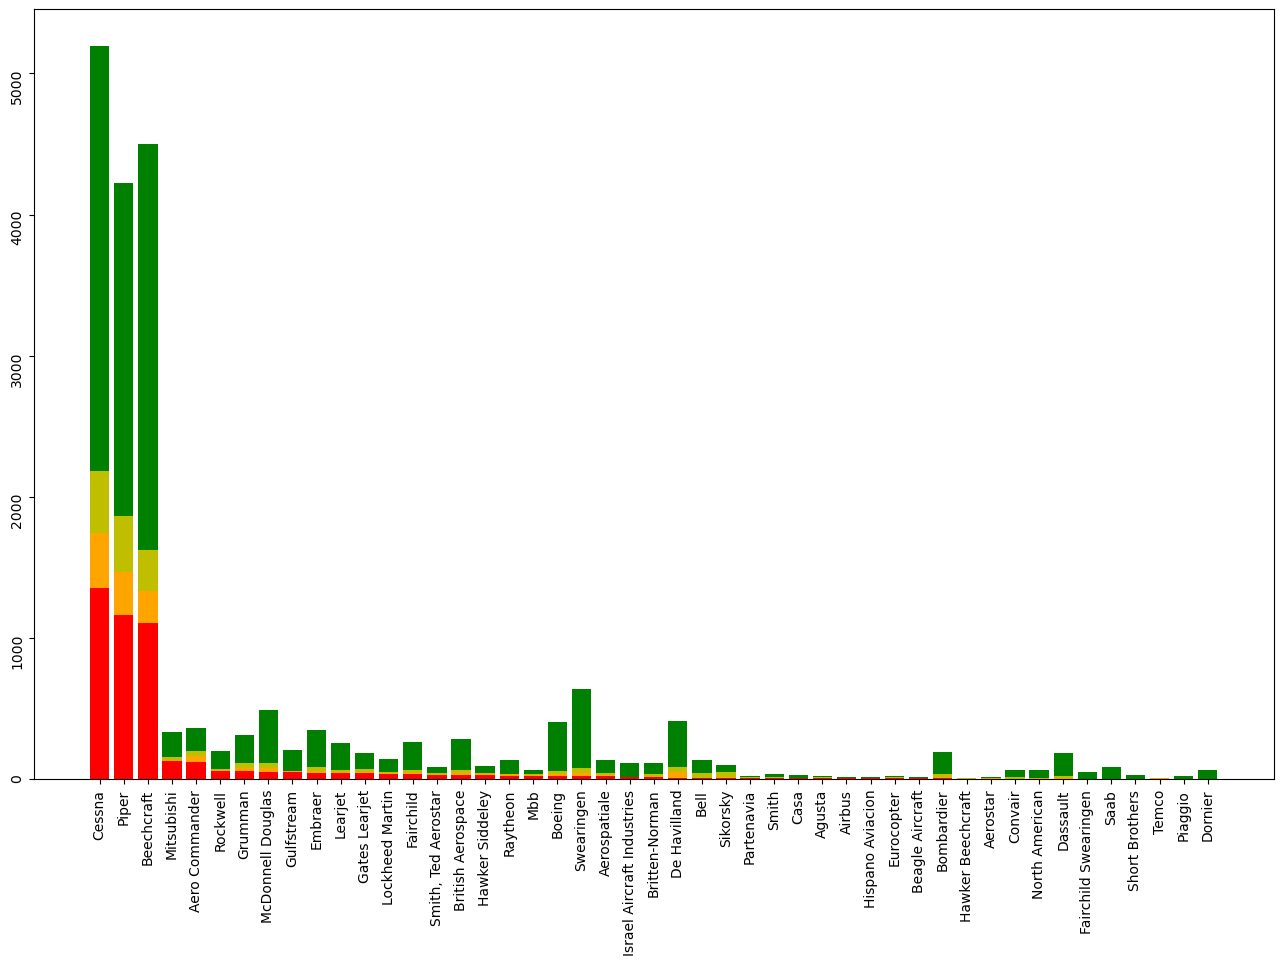

In [2983]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(private_outcome_by_make.index, private_fatal_injuries, color = 'r')
ax.bar(private_outcome_by_make.index, private_serious_injuries, bottom=private_fatal_injuries, color = 'orange')
ax.bar(private_outcome_by_make.index, private_minor_injuries, bottom=private_fatal_injuries+private_serious_injuries, color = 'y')
ax.bar(private_outcome_by_make.index, private_uninjured, bottom=private_fatal_injuries+private_serious_injuries+private_minor_injuries, color = 'g')
ax.tick_params(rotation = 90)

Exclude the top 3 to understand the rest better

In [2984]:
private_outcome_by_make_3 = private_outcome_by_make.copy()
private_outcome_by_make_3.drop(index= ["Cessna", "Piper", "Beechcraft"], axis = 0,inplace=True)
private_fatal_injuries_3 = private_outcome_by_make_3['Total.Fatal.Injuries']
private_serious_injuries_3 = private_outcome_by_make_3['Total.Serious.Injuries']
private_minor_injuries_3 = private_outcome_by_make_3['Total.Minor.Injuries']
private_uninjured_3 = private_outcome_by_make_3['Total.Uninjured']

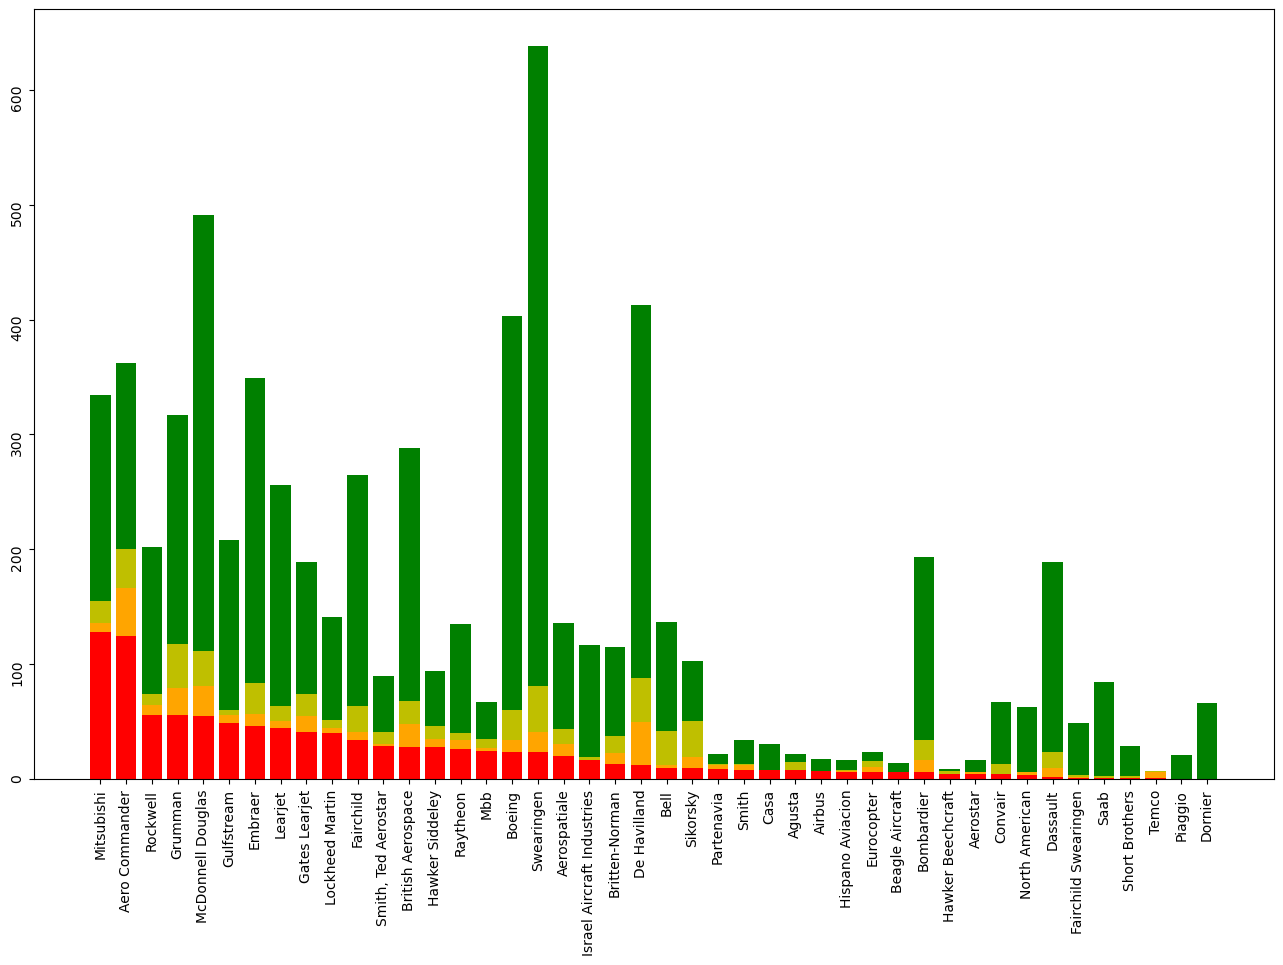

In [2985]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(private_outcome_by_make_3.index, private_fatal_injuries_3, color = 'r')
ax.bar(private_outcome_by_make_3.index, private_serious_injuries_3, bottom=private_fatal_injuries_3, color = 'orange')
ax.bar(private_outcome_by_make_3.index, private_minor_injuries_3, bottom=private_fatal_injuries_3+private_serious_injuries_3, color = 'y')
ax.bar(private_outcome_by_make_3.index, private_uninjured_3, bottom=private_fatal_injuries_3+private_serious_injuries_3+private_minor_injuries_3, color = 'g')
ax.tick_params(rotation = 90)

In [2986]:
private_survivability_by_make = private_outcome_by_make.copy()
private_survivability_by_make['Survivability'] = (private_survivability_by_make['Total.Uninjured']+private_survivability_by_make['Total.Serious.Injuries']+
                                          private_survivability_by_make['Total.Minor.Injuries'])/private_survivability_by_make['Total.Souls']
#survivability_by_make.sort_values(by='Survivability', ascending=False, inplace=True)
private_survivability_by_make.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Survivability
Make,,,,,,,
Cessna,1352.0,390.0,442.0,3011.0,5195.0,1801,0.739750
Piper,1167.0,298.0,398.0,2360.0,4223.0,1551,0.723656
Beechcraft,1105.0,228.0,292.0,2875.0,4500.0,1437,0.754444
Mitsubishi,128.0,8.0,19.0,179.0,334.0,106,0.616766
Aero Commander,125.0,41.0,34.0,162.0,362.0,147,0.654696


/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/3698477002.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0., 46], [0.95, 0.95], "k--", color = 'g');


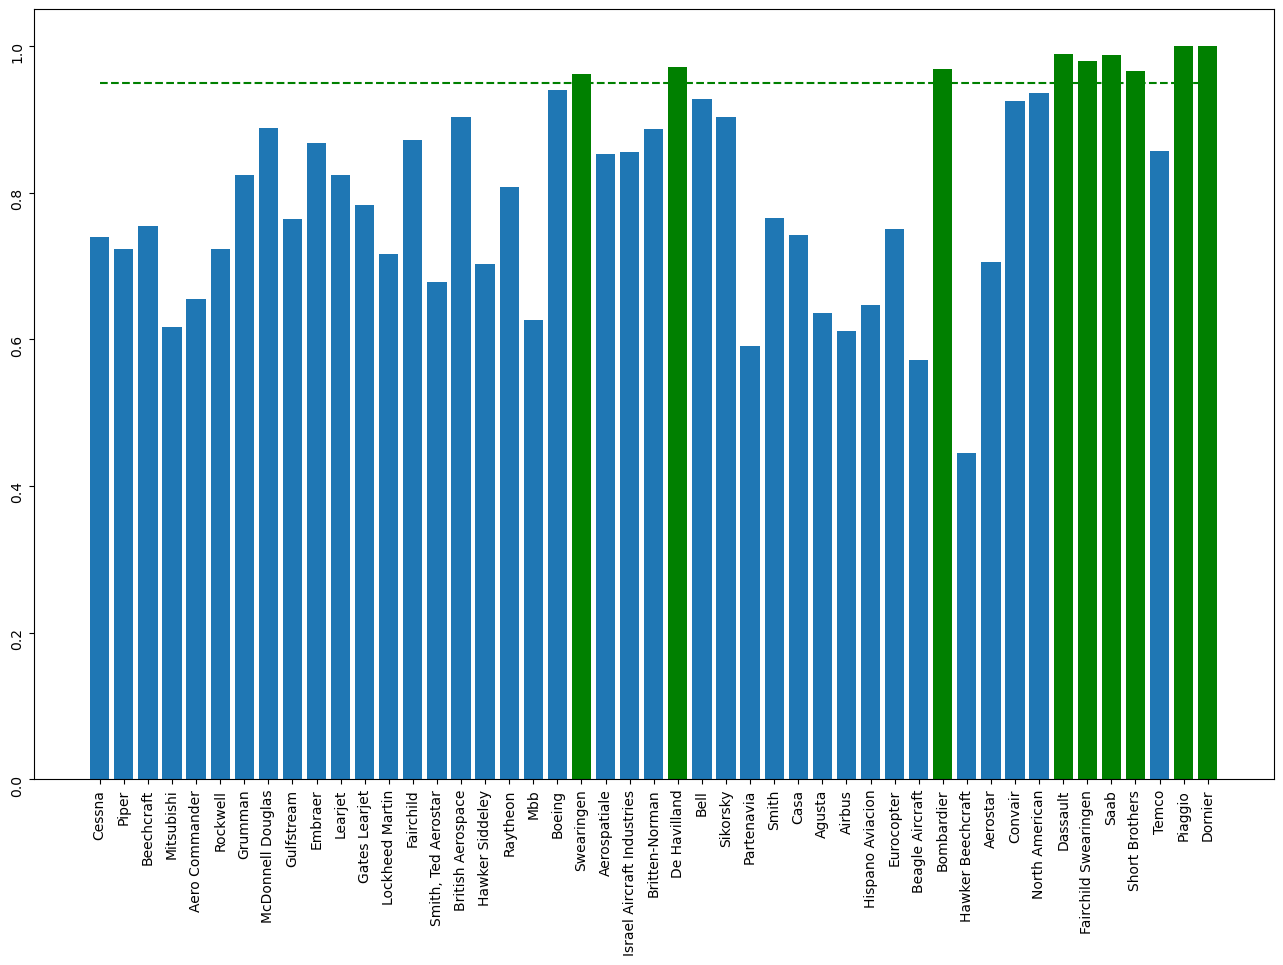

In [2987]:
fig, ax = plt.subplots(figsize = (16,10))
threshold = private_survivability_by_make[private_survivability_by_make['Survivability']>=0.95].index
colours = ['g' if element in threshold else '#1f77b4' for element in private_survivability_by_make.index]
ax.bar(private_survivability_by_make.index, private_survivability_by_make['Survivability'], color = colours)
ax.tick_params(rotation = 90)
ax.plot([0., 46], [0.95, 0.95], "k--", color = 'g');

Private Makers:
- Swearingen
- De Havilland
- Bombardier
- Dassault
- FAirchild Swearingen
- Short Brothers
- Piaggio
- Dornier

In [2988]:
private_makers = ['Swearingen', 'De Havilland', 'Bombardier', 'Dassault', 'Fairchild', 'Fairchild Swearingen', 'Short Brothers', 'Piaggio', 'Dornier']
df_private_makers = df_private.copy()
df_private_makers = df_private_makers[df_private_makers['Make'].isin(private_makers)]
df_private_makers['Make'].value_counts()

Make
Swearingen              108
De Havilland             50
Fairchild                41
Dassault                 38
Bombardier               31
Short Brothers           10
Fairchild Swearingen      7
Dornier                   7
Piaggio                   5
Name: count, dtype: int64

In [2989]:
private_outcome_by_model = df_private_makers.groupby('Model').sum(numeric_only=True)
private_outcome_by_model['Total.Events'] = df_private_makers.groupby('Model').size()
private_outcome_by_model = private_outcome_by_model[(private_outcome_by_model['Total.Events']>=2) & (private_outcome_by_model['Total.Souls']>10)]
private_outcome_by_model = private_outcome_by_model.sort_values(by = 'Total.Fatal.Injuries', ascending=False)
private_outcome_by_model

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events
Model,,,,,,,
SA227-AC,28.0,14.0,4.0,9.0,60.0,87.0,14
SA-226TC,20.0,12.0,1.0,5.0,59.0,77.0,10
SA-227AC,12.0,11.0,1.0,10.0,37.0,59.0,6
SA227-TT,4.0,4.0,0.0,0.0,7.0,11.0,2
CL-600-2A12,4.0,3.0,3.0,0.0,5.0,11.0,2
SA227-AT,6.0,3.0,2.0,2.0,10.0,17.0,3
DHC-6-200,14.0,3.0,8.0,6.0,37.0,54.0,7
FALCON 50,9.0,2.0,0.0,2.0,8.0,12.0,3
DHC-6,22.0,2.0,10.0,1.0,83.0,96.0,11


In [2990]:
private_fatal_injuries = private_outcome_by_model['Total.Fatal.Injuries']
private_serious_injuries = private_outcome_by_model['Total.Serious.Injuries']
private_minor_injuries = private_outcome_by_model['Total.Minor.Injuries']
private_uninjured = private_outcome_by_model['Total.Uninjured']

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/252013687.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0., 34], [25, 25], "k--", color = 'b')


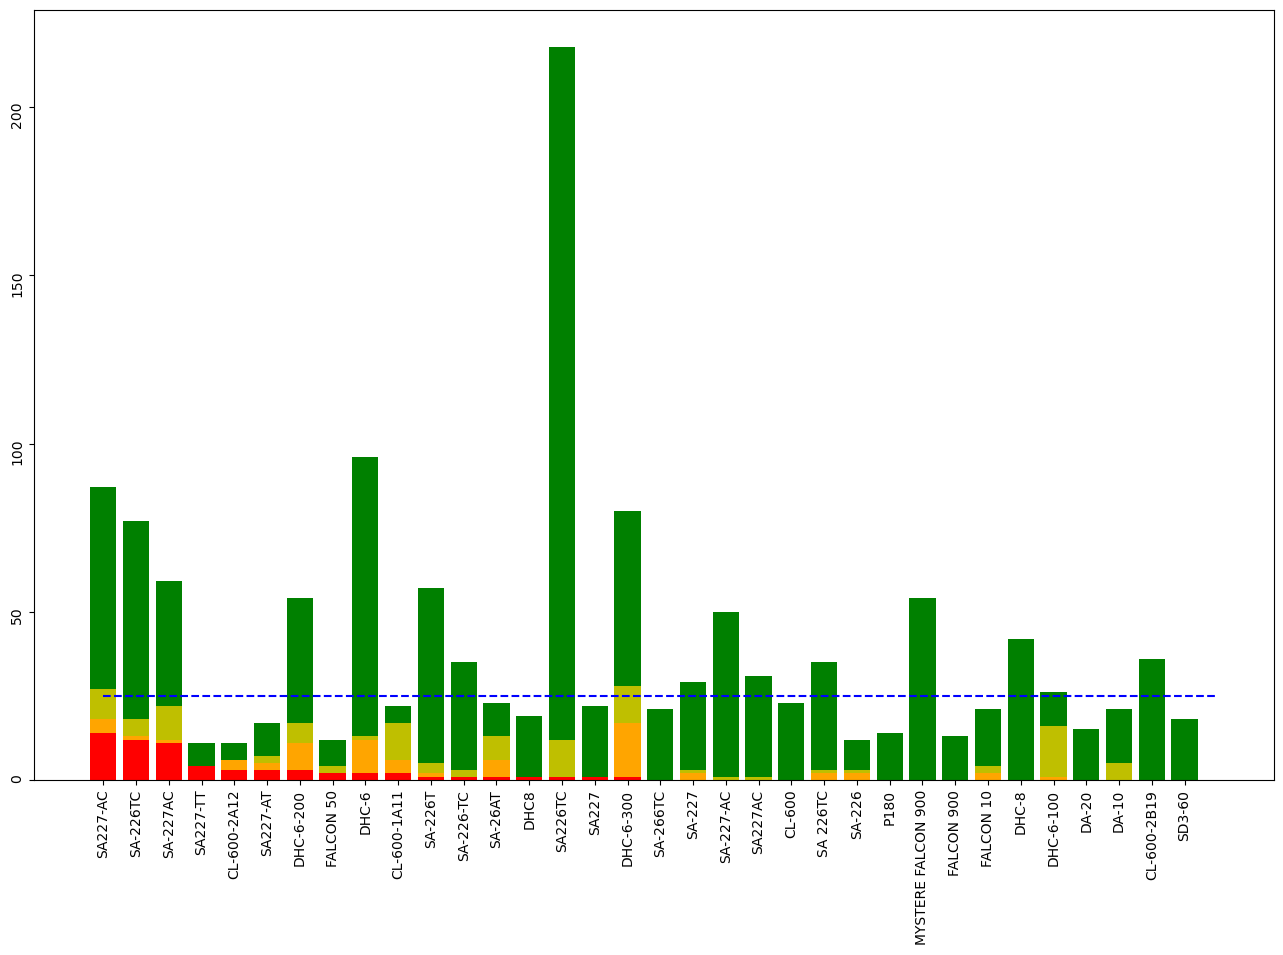

In [2991]:
fig, ax = plt.subplots(figsize = (16,10))
ax.bar(private_outcome_by_model.index, private_fatal_injuries, color = 'r')
ax.bar(private_outcome_by_model.index, private_serious_injuries, bottom=private_fatal_injuries, color = 'orange')
ax.bar(private_outcome_by_model.index, private_minor_injuries, bottom=private_fatal_injuries+private_serious_injuries, color = 'y')
ax.bar(private_outcome_by_model.index, private_uninjured, bottom=private_fatal_injuries+private_serious_injuries+private_minor_injuries, color = 'g')
ax.plot([0., 34], [25, 25], "k--", color = 'b')
ax.tick_params(rotation = 90)

In [2992]:
private_survivability_by_model = private_outcome_by_model.copy()
private_survivability_by_model['Survivability'] = (private_survivability_by_model['Total.Uninjured']+
                                                   private_survivability_by_model['Total.Serious.Injuries']+
                                                   private_survivability_by_model['Total.Minor.Injuries'])/private_survivability_by_model['Total.Souls']
private_survivability_by_model.head()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Survivability
Model,,,,,,,,
SA227-AC,28.0,14.0,4.0,9.0,60.0,87.0,14,0.839080
SA-226TC,20.0,12.0,1.0,5.0,59.0,77.0,10,0.844156
SA-227AC,12.0,11.0,1.0,10.0,37.0,59.0,6,0.813559
SA227-TT,4.0,4.0,0.0,0.0,7.0,11.0,2,0.636364
CL-600-2A12,4.0,3.0,3.0,0.0,5.0,11.0,2,0.727273


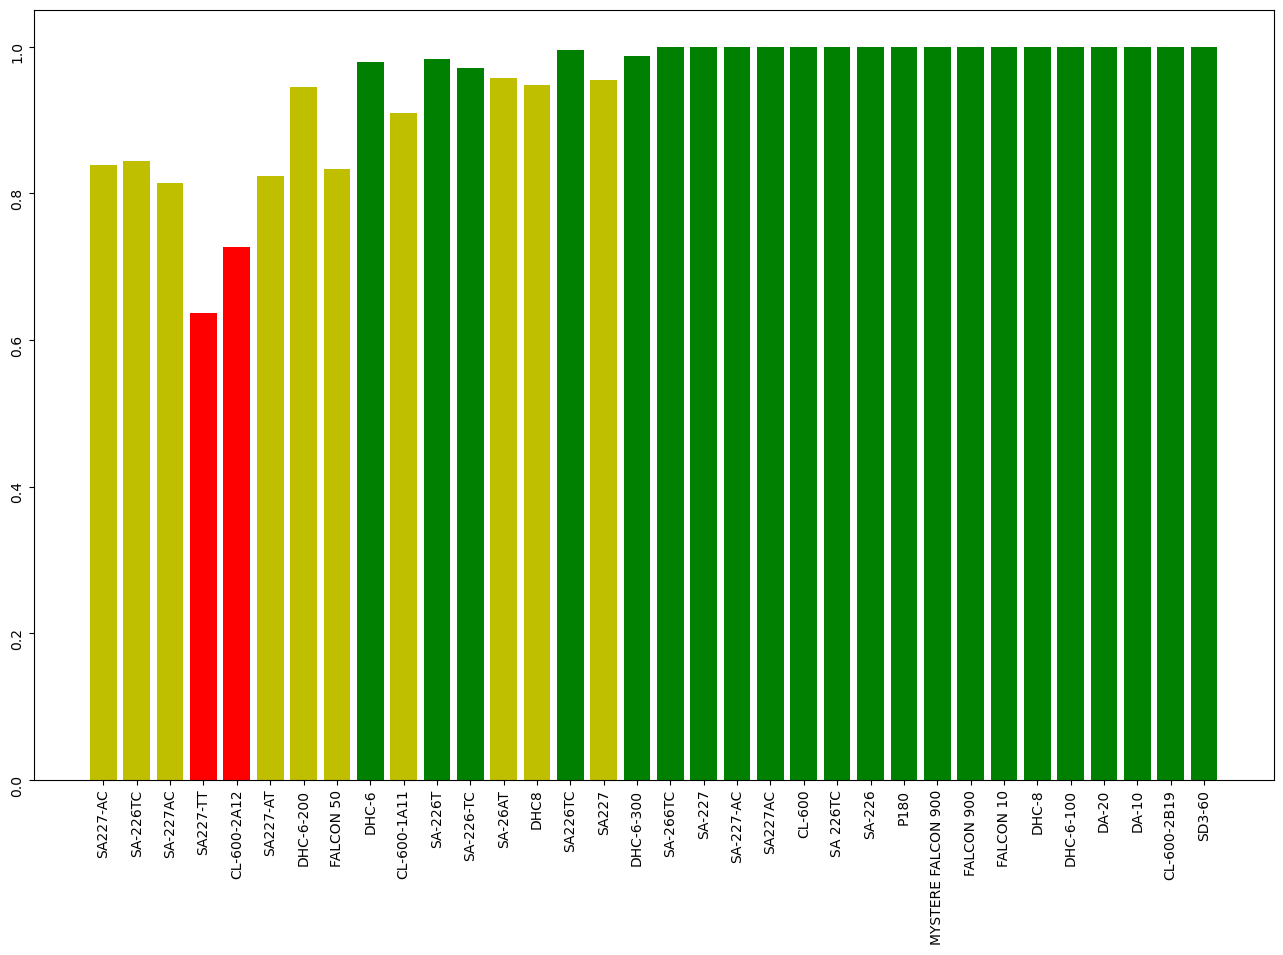

In [2993]:
fig, ax = plt.subplots(figsize = (16,10))
low_colours = private_survivability_by_model[private_survivability_by_model['Survivability']<0.8].index
mid_colours = private_survivability_by_model[(private_survivability_by_model['Survivability']>0.8) & (private_survivability_by_model['Survivability']<0.97)].index
colours = ['r' if element in low_colours else 'y' if element in mid_colours else 'g' for element in private_survivability_by_model.index]
ax.bar(private_survivability_by_model.index, private_survivability_by_model['Survivability'], color = colours)
ax.tick_params(rotation = 90);

Private Aircraft Candidates:
- SA 226 (THERE'S A LOT OF THESE)
- CL 600
- DHC-6
- SA 227
- Falcon 900
- DHC-8

These aircraft will now be evaluated against each other using metrics such as accident years, average souls on board, engine type and qualitative measures

In [2994]:
private_models = ['SA227-AC', 'SA-226TC', 'SA-227AC', 'SA227-TT', 'SA227-AT', 'DHC-6-200', 'DHC-6', 'CL-600-1A11', 'DHC-8', 'DHC8',
                  'SA-226-TC', 'SA227', 'DHC-6-300', 'SA-266TC', 'SA-227AC', 'SA-227', 'SA227AC', 'CL-600', 
                  'MYSTERE FALCON 900', 'FALCON 900', 'DHC-8', 'DHC-6-100', 'CL-600-2B19']
private_final = df_private[df_private['Model'].isin(private_models)]
private_final

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Total.Souls
377,20020917X01912,Accident,DCA82AA016,1982-02-21,"PROVIDENCE, RI",United States,Fatal(1),Destroyed,Airplane,N127PM,...,No,2.0,Turbo Prop,Unknown,1.0,10.0,1.0,0.0,VMC,12.0
515,20020917X01899,Incident,CHI82IA082,1982-03-09,"SOUTH BEND, IN",United States,Incident,Minor,Airplane,N323BA,...,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,9.0,UNK,9.0
1216,20020917X03101,Accident,DCA82AA022,1982-05-16,"HOOPER BAY, AK",United States,Non-Fatal,Destroyed,Airplane,N103AQ,...,No,2.0,Turbo Prop,Unknown,0.0,8.0,0.0,0.0,VMC,8.0
1581,20020917X02713,Incident,ANC82IA048,1982-06-16,"NEAR PORT HEIDE, AK",United States,Incident,Minor,Airplane,N525N,...,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,10.0,VMC,10.0
2598,20020917X04422,Incident,CHI82IA331,1982-09-01,"APPLETON, WI",United States,Incident,Minor,Airplane,N261S,...,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79486,20161214X65650,Incident,CEN16WA396,2016-09-20,"Cologne, Germany",Germany,Non-Fatal,Minor,Airplane,D-CPSW,...,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC,2.0
79832,20161205X33941,Accident,ERA17FA066,2016-12-06,"Camilla, GA",United States,Fatal,Destroyed,Airplane,N765FA,...,No,2.0,Turbo Prop,Unknown,1.0,0.0,0.0,0.0,IMC,1.0
81699,20180111X85842,Accident,GAA18CA098,2018-01-11,"Rock Springs, WY",United States,Non-Fatal,Substantial,Airplane,N561UP,...,No,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,1.0,VMC,1.0
82864,20180812X92421,Accident,WPR18FA220,2018-08-11,"Steilacoom, WA",United States,Fatal,Destroyed,Airplane,N449QX,...,No,2.0,Turbo Prop,Unknown,1.0,0.0,0.0,0.0,VMC,1.0


In [2995]:
private_aircraft_mapping = {
    'SA227-AC': 'SA-227',
    'SA-226TC': 'SA-226',
    'SA-227AC': 'SA-227',
    'SA227-TT': 'SA-227',
    'SA227-AT': 'SA-227',
    'SA-226-TC': 'SA-226',
    'SA-266TC': 'SA-226',
    'SA-227AC': 'SA-227',
    'SA227': 'SA-227',
    'SA227AC': 'SA-227',
    'DHC-6-200': 'DHC-6',
    'DHC-6': 'DHC-6',
    'DHC-6-300': 'DHC-6',
    'DHC-6-100': 'DHC-6',
    'DHC8': 'DHC-8',
    'CL-600-1A11': 'CL-600',
    'CL-600-2B19': 'CL-600',
    'MYSTERE FALCON 900': 'FALCON 900',
    'FALCON 900': 'FALCON 900'
}

# Applying the mapping to your DataFrame
private_final['Model'] = private_final['Model'].replace(private_aircraft_mapping)

/var/folders/sh/s_xv2d8x6kv1_qyc9qgmkv300000gn/T/ipykernel_92288/79809320.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  private_final['Model'] = private_final['Model'].replace(private_aircraft_mapping)


In [2996]:
private_final['Model'].value_counts()

Model
SA-227        39
DHC-6         30
SA-226        16
CL-600        11
FALCON 900     7
DHC-8          5
Name: count, dtype: int64

In [2997]:
private_final['Engine.Type'].value_counts()

Engine.Type
Turbo Prop    90
Turbo Fan     18
Name: count, dtype: int64

Turbofans are more verstaile with range and offer the luxury that customers in this segment would be looking for

In [2998]:
private_final=private_final[private_final['Engine.Type']=='Turbo Fan']
private_final.Model

3620         CL-600
17390        CL-600
21794        CL-600
22255    FALCON 900
34713    FALCON 900
44287    FALCON 900
50058    FALCON 900
54585        CL-600
55995        CL-600
58138        CL-600
58286        CL-600
58304        CL-600
58831        CL-600
60194        CL-600
62295        CL-600
62673    FALCON 900
63464    FALCON 900
76893    FALCON 900
Name: Model, dtype: object

In [3002]:
private_final_stats = private_final.groupby('Model').mean(numeric_only=True)
private_final_stats['Total.Events'] = private_final.groupby('Model').size()
private_final_stats['Incident.Year'] = private_final[['Model', 'Event.Date']].groupby("Model").mean()['Event.Date'].dt.year
private_final_stats

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Souls,Total.Events,Incident.Year
Model,,,,,,,,
CL-600,2.000000,0.181818,0.363636,1.0,5.818182,7.363636,11,2000
FALCON 900,2.857143,0.000000,0.000000,0.0,9.571429,9.571429,7,2001


<BarContainer object of 2 artists>

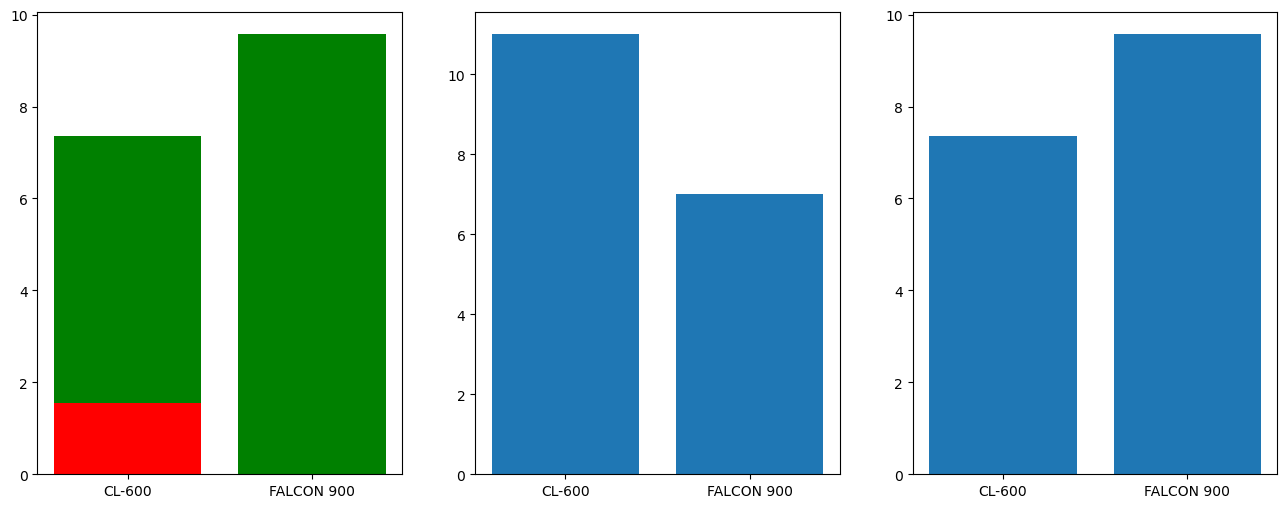

In [3004]:
fig, ax = plt.subplots(nrows=1, ncols =3, figsize= (16,6))
ax[0].bar(private_final_stats.index, (private_final_stats['Total.Souls'] - private_final_stats['Total.Uninjured']), color = 'r')
ax[0].bar(private_final_stats.index, private_final_stats['Total.Uninjured'], color = 'g', bottom = (private_final_stats['Total.Souls'] - private_final_stats['Total.Uninjured']))

ax[1].bar(private_final_stats.index, private_final_stats['Total.Events'])

ax[2].bar(private_final_stats.index, private_final_stats['Total.Souls'])

While these two jets are similar with little to separate them, the airline should opt to add a Dassault Falcon 900 to its private fleet. While neither jet has had any fatality as a result of an accident, the CL-600 tends to have a smaller proportion of individuals coming away from an Event uninjured, thus docking some points from its safety rating. In addition to this, the Falcon 900 has had less Events than the CL-600, which is indicative of a safer jet. Finally, from a business perspective, the Falcon 900 can carry on average, over 2 individuals more than the CL-600. This will allow the airline a greater level of flexibility with regards to passenger loads.